In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import date as dt
import plotly.express as px
import plotly.io as pio

In [3]:
df= pd.read_csv("ameo dataset.csv")
print("shape =",df.shape)
df.head()

shape = (3998, 39)


Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [5]:
desc_df=pd.read_csv("Ameo_DataDescription - Sheet1.csv")
desc_df

VARIABLES                       TYPE  \
0                      ID                        UID   
1                  Salary                 Continuous   
2                     DOJ                       Date   
3                     DOL                       Date   
4             Designation                Categorical   
5                 JobCity                Categorical   
6                  Gender                Categorical   
7                     DOB                       Date   
8            10percentage                 Continuous   
9                 10board                 Continuous   
10           12graduation                       Date   
11           12percentage                 Continuous   
12                12board                       Date   
13              CollegeID                      NA/ID   
14            CollegeTier                Categorical   
15                 Degree                Categorical   
16         Specialization                Categorical   
17             CollegeGPA                 Continuous   
18          CollegeCityID                      NA/ID   
19        CollegeCityTier                Categorical   
20           CollegeState                Categorical   
21         GraduationYear                       Date   
22                English                 Continuous   
23                Logical                 Continuous   
24                  Quant                 Continuous   
25                 Domain   Continuous/ Standardized   
26    ComputerProgramming                 Continuous   
27  ElectronicsAndSemicon                 Continuous   
28        ComputerScience                 Continuous   
29         MechanicalEngg                 Continuous   
30         ElectricalEngg                 Continuous   
31            TelecomEngg                 Continuous   
32              CivilEngg                 Continuous   
33      conscientiousness   Continuous/ Standardized   
34          agreeableness  Continuous/\nStandardized   
35           extraversion   Continuous/ Standardized   
36            neuroticism  Continuous/\nStandardized   
37  openess_to_experience   Continuous/ Standardized   

                                          Description  
0                 A unique ID to identify a candidate  
1         Annual CTC oﬀered to the candidate (in INR)  
2                         Date of joining the company  
3                         Date of leaving the company  
4                       Designation oﬀered in the job  
5                          Location of the job (city)  
6                                  Candidate’s gender  
7                          Date of birth of candidate  
8    Overall marks obtained in grade 10\nexaminations  
9   The school board whose curriculum the candidat...  
10       Year of graduation - senior year high school  
11   Overall marks obtained in grade 12\nexaminations  
12  The school board whose curriculum the candidat...  
13  Unique ID identifying the college which the ca...  
14                                    Tier of college  
15           Degree obtained/pursued by the candidate  
16            Specialization pursued by the candidate  
17                        Aggregate GPA at graduation  
18  A unique ID to identify the city in which the ...  
19  The tier of the city in which the college is l...  
20                                     Name of States  
21             Year of graduation (Bachelor’s degree)  
22                    Scores in AMCAT English section  
23                    Scores in AMCAT Logical section  
24               Scores in AMCAT Quantitative section  
25                    Scores in AMCAT’s domain module  
26     Score in AMCAT’s Computer programming\nsection  
27  Score in AMCAT’s Electronics & Semiconductor E...  
28          Score in AMCAT’s Computer Science section  
29   Score in AMCAT’s Mechanical Engineering\nsection  
30    Score in AMCAT’s Electrical Engineering section  
31  Score in AMCAT’s Telecommunication 

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset contains around 40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

The Columns Date of Letter(DOL) and Date of Joining(DOJ) and Date of Birth(DOB) Should have to converted to Datetime

Data Cleaning =


In [7]:
df.drop(['Unnamed: 0','CollegeID','CollegeCityID','CollegeCityTier','ID','conscientiousness',
         'agreeableness','extraversion','nueroticism','openess_to_experience'],axis=1,inplace=True)

Now Let's Look At Unique Values In Each Columns, To Eliminate Unwanted Values or Outliers

In [8]:
for i in df.columns:
    print(f"the {i} column-->",df[i].unique(),f"\n\n{"*"* 100}\n")

the Salary column--> [ 420000.  500000.  325000. 1100000.  200000.  300000.  400000.  600000.
  230000.  450000.  270000.  350000.  250000.  120000.  320000.  190000.
  180000.  335000.  435000.  345000.  145000.  220000.  530000.  340000.
  360000.  215000.   80000.  330000.  380000.  110000.  205000.   95000.
  390000.   60000.  240000.  525000.  305000.  150000.  310000.  455000.
  800000.  100000.  280000.  445000.  315000.  370000.  275000. 1500000.
  425000.  470000.  460000.  510000.  480000.  170000.  640000.  225000.
  440000. 1200000.  675000.  105000.  195000.  385000.  235000.  615000.
  290000.  140000.  405000. 1860000.  375000.  430000.  660000.   70000.
  410000.  550000.   35000.  115000.  415000.  265000.  285000.  245000.
  395000.  560000.  700000.  185000.  160000.  625000.   85000.  135000.
  785000.  210000.  155000.  355000.  535000.  690000.  260000. 1110000.
 1000000.  505000.  475000.  715000.  820000.   90000.  720000. 2600000.
  515000.   55000.  495000.   

after seeing the columns value some columns has wierd values like: 'present', -1, 0

'present' --> represents date of data collected time
'-1'--------> represts unknown or not present
'0' --------> represent unkown or missing value

In [9]:
df[df["GraduationYear"]==0]

Salary          DOJ          DOL       Designation     JobCity Gender  \
2664  325000.0  7/1/14 0:00  7/1/15 0:00  systems engineer  Chandigarh      m   

                DOB  10percentage 10board  12graduation  ...  Logical Quant  \
2664  12/17/91 0:00          89.0    cbse          2010  ...      655   680   

        Domain ComputerProgramming ElectronicsAndSemicon  ComputerScience  \
2664  0.755375                  -1                    -1               -1   

     MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  
2664            446              -1           -1         -1  

[1 rows x 29 columns]

In [10]:
df.drop(index=df[df["GraduationYear"]==0].index,inplace=True)

In Date of Letter(DOL) Column Many Values contains 'Present' As Mention earlier , the dataset was released by AMEO 2015. So Let's replace with 31/12/2015 Date

In [11]:
df["DOL"]=df["DOL"].str.replace("present","31/12/15 00:00:00")
df["DOL"]= pd.to_datetime(df["DOL"])

C:\Users\Aniket\AppData\Local\Temp\ipykernel_19848\1000125355.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["DOL"]= pd.to_datetime(df["DOL"])


In [12]:
df["DOJ"]= pd.to_datetime(df["DOJ"])

C:\Users\Aniket\AppData\Local\Temp\ipykernel_19848\4184828422.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["DOJ"]= pd.to_datetime(df["DOJ"])


In [13]:
df["DOL"].value_counts()

DOL
2015-12-31    1875
2015-04-01     573
2015-03-01     124
2015-05-01     112
2015-01-01      99
              ... 
2005-03-01       1
2015-10-01       1
2010-02-01       1
2011-02-01       1
2010-10-01       1
Name: count, Length: 67, dtype: int64

In [14]:
df["DOB"]= pd.to_datetime(df["DOB"])

C:\Users\Aniket\AppData\Local\Temp\ipykernel_19848\2237865336.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["DOB"]= pd.to_datetime(df["DOB"])


OK, it's Converted to datetime. Let's Find the Age of the People

In [15]:
age=(df["DOL"]-df["DOB"]).dt.days// 365
df.insert(1,column="Age",value=age)


In [16]:
df.columns

Index(['Salary', 'Age', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender',
       'DOB', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg'],
      dtype='object')

In [17]:
df["Age"]

0       25
1       26
2       23
3       26
4       24
        ..
3993    25
3994    20
3995    24
3996    22
3997    24
Name: Age, Length: 3997, dtype: int64

In [18]:
df.replace(-1,np.nan,inplace=True)
df["JobCity"].replace("-1",np.nan,inplace=True)
df["JobCity"].value_counts()

JobCity
Bangalore           627
Noida               368
Hyderabad           335
Pune                290
Chennai             272
                   ... 
Asansol               1
Tirunelvelli          1
Ernakulam             1
Nanded                1
Asifabadbanglore      1
Name: count, Length: 338, dtype: int64

let's look at NaN Values in All Columns

In [19]:
df.isna().sum()

Salary                      0
Age                         0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       867
ElectronicsAndSemicon    2853
ComputerScience          3095
MechanicalEngg           3763
ElectricalEngg           3836
TelecomEngg              3623
CivilEngg                3955
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.describe()

Salary          Age                            DOJ  \
count  3.997000e+03  3997.000000                           3997   
mean   3.076955e+05    23.812860  2013-07-02 08:53:11.993995264   
min    3.500000e+04    18.000000            1991-06-01 00:00:00   
25%    1.800000e+05    23.000000            2012-10-01 00:00:00   
50%    3.000000e+05    24.000000            2013-11-01 00:00:00   
75%    3.700000e+05    25.000000            2014-07-01 00:00:00   
max    4.000000e+06    35.000000            2015-12-01 00:00:00   
std    2.127639e+05     1.703498                            NaN   

                                 DOL                            DOB  \
count                           3997                           3997   
mean   2015-03-24 05:11:16.407305472  1990-12-06 03:45:53.365023744   
min              2005-03-01 00:00:00            1977-10-30 00:00:00   
25%              2014-11-01 00:00:00            1989-11-16 00:00:00   
50%              2015-05-01 00:00:00            1991-03-07 00:00:00   
75%              2015-12-31 00:00:00            1992-03-14 00:00:00   
max              2015-12-31 00:00:00            1997-05-27 00:00:00   
std                              NaN                            NaN   

       10percentage  12graduation  12percentage  CollegeTier   collegeGPA  \
count   3997.000000   3997.000000   3997.000000  3997.000000  3997.000000   
mean      77.922672   2008.087065     74.463680     1.925694    71.486853   
min       43.000000   1995.000000     40.000000     1.000000     6.450000   
25%       71.670000   2007.000000     66.000000     2.000000    66.400000   
50%       79.140000   2008.000000     74.400000     2.000000    71.720000   
75%       85.670000   2009.000000     82.600000     2.000000    76.330000   
max       97.760000   2013.000000     98.700000     2.000000    99.930000   
std        9.849837      1.653529     10.999999     0.262301     8.168246   

       ...      Logical        Quant       Domain  ComputerProgramming  \
count  ...  3997.000000  3997.000000  3751.000000          3130.000000   
mean   ...   501.560420   513.336502     0.609486           451.301278   
min    ...   195.000000   120.000000     0.002750           105.000000   
25%    ...   445.000000   430.000000     0.376060           385.000000   
50%    ...   505.000000   515.000000     0.649390           455.000000   
75%    ...   565.000000   595.000000     0.842248           515.000000   
max    ...   795.000000   900.000000     0.999910           840.000000   
std    ...    86.760216   122.289224     0.273185            97.158687   

       ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
count            1144.000000       902.000000      234.000000      161.000000   
mean              335.644231       405.636364      406.709402      433.037267   
min               133.000000       130.000000      180.000000      206.000000   
25%               292.000000       346.000000      360.000000      366.000000   
50%               333.000000       407.000000      407.000000      433.000000   
75%               388.000000       469.000000      446.000000      500.000000   
max               612.000000       715.000000      623.000000      676.000000   
std                81.194840        89.960805       85.038195       98.515537   

       TelecomEngg   CivilEngg  
count   374.000000   42.000000  
mean    350.173797  349.666667  
min     153.000000  166.000000  
25%     287.500000  292.000000  
50%     356.000000  348.000000  
75%     393.000000  388.000000  
max     548.000000  516.000000  
std      75.661864   79.784670  

[8 rows x 22 columns]

In [22]:
df["JobCity"].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', nan, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', 

as we can see lot of spelling errors in jobcity values

In [23]:
df["JobCity"].nunique()

338

In [24]:
jobcity_choices = ['Bangalore','Indore','Chennai','Manesar','Hyderabad',
          'Noida','Kolkata','Pune','Gurgaon','Mumbai',
           'New Delhi','Mangalore','Rewari','Gaziabaad','Bhiwadi','Trivandrum','Lucknow','Pune',
           'Jaipur','Mysore']

In [25]:
from fuzzywuzzy import process
def correct_spelling_errors(target_word="", choices=[], threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

C:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [26]:
df['JobCity'] = df['JobCity'].apply(lambda city: correct_spelling_errors(str(city),choices=jobcity_choices))


In [27]:
df['JobCity'] = df['JobCity'].apply(lambda x : np.nan if x == 'nan' else x)


In [28]:
df['JobCity'].value_counts()

JobCity
Bangalore     683
Noida         420
Hyderabad     371
Pune          327
Chennai       315
             ... 
Nanded          1
Dharmapuri      1
Vandavasi       1
Rohtak          1
haryana         1
Name: count, Length: 242, dtype: int64

In [29]:
df['JobCity'].nunique()

242

Let Calculate AMCAT Score In All the Subjects

In [30]:
total_score= df.select_dtypes(include=["float64"])
df["Total_Score"]=total_score.iloc[:,4:].sum(axis=1)

In [31]:
df

Salary  Age        DOJ        DOL                  Designation  \
0      420000.0   25 2012-06-01 2015-12-31      senior quality engineer   
1      500000.0   26 2013-09-01 2015-12-31            assistant manager   
2      325000.0   23 2014-06-01 2015-12-31             systems engineer   
3     1100000.0   26 2011-07-01 2015-12-31     senior software engineer   
4      200000.0   24 2014-03-01 2015-03-01                          get   
...         ...  ...        ...        ...                          ...   
3993   280000.0   25 2011-10-01 2012-10-01            software engineer   
3994   100000.0   20 2013-07-01 2013-07-01             technical writer   
3995   320000.0   24 2013-07-01 2015-12-31  associate software engineer   
3996   200000.0   22 2014-07-01 2015-01-01           software developer   
3997   400000.0   24 2013-02-01 2015-12-31      senior systems engineer   

        JobCity Gender        DOB  10percentage  \
0     Bangalore      f 1990-02-19         84.30   
1        Indore      m 1989-10-04         85.40   
2       Chennai      f 1992-08-03         85.00   
3       Gurgaon      m 1989-12-05         85.60   
4       Manesar      m 1991-02-27         78.00   
...         ...    ...        ...           ...   
3993  New Delhi      m 1987-04-15         52.09   
3994  Hyderabad      f 1992-08-27         90.00   
3995  Bangalore      m 1991-07-03         81.86   
3996  Bangalore      f 1992-03-20         78.72   
3997    Chennai      f 1991-02-26         70.60   

                             10board  ...  Quant    Domain  \
0     board ofsecondary education,ap  ...    525  0.635979   
1                               cbse  ...    780  0.960603   
2                               cbse  ...    370  0.450877   
3                               cbse  ...    625  0.974396   
4                               cbse  ...    465  0.124502   
...                              ...  ...    ...       ...   
3993                            cbse  ...    475  0.276047   
3994                     state board  ...    535  0.881620   
3995                      bse,odisha  ...    465  0.488348   
3996                     state board  ...    320  0.744758   
3997                            cbse  ...    464  0.600057   

     ComputerProgramming  ElectronicsAndSemicon ComputerScience  \
0                  445.0                    NaN             NaN   
1                    NaN                  466.0             NaN   
2                  395.0                    NaN             NaN   
3                  615.0                    NaN             NaN   
4                    NaN                  233.0             NaN   
...                  ...                    ...             ...   
3993               345.0                    NaN             NaN   
3994               325.0                  420.0             NaN   
3995               405.0                    NaN             NaN   
3996               445.0                    NaN           438.0   
3997               435.0                    NaN             NaN   

     MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  Total_Score  
0               NaN             NaN         NaN        NaN   445.635979  
1               NaN             NaN         NaN        NaN   466.960603  
2               NaN             NaN         NaN        NaN   395.450877  
3               NaN             NaN         NaN        NaN   615.974396  
4               NaN             NaN         NaN        NaN   233.124502  
...             ...             ...         ...        ...          ...  
3993            NaN             NaN         NaN        NaN   345.276047  
3994            NaN             NaN         NaN        NaN   745.881620  
3995            NaN             NaN         NaN        NaN   405.488348  
3996            NaN             NaN         NaN        NaN   883.744758  
3997            NaN             NaN         NaN        NaN   435.600057  

[3997 rows x 31 columns]

Salary Is Our Target.
Let's Look at Maximum and Minimum Salary In Given Dataset:

In [32]:
highest_sal = df['Salary'].min()
highest_sal_index = df['Salary'].idxmax()
print('The highest salary of Designation',df[df['Salary'] == highest_sal]['Designation'].values[0],'and',df[df['Salary'] == highest_sal]['Designation'].values[1], 'has',df.loc[highest_sal_index,'Salary'])

The highest salary of Designation systems engineer and systems engineer has 4000000.0


In [33]:
print('the lowest salary has',df["Salary"].min(),'in the Designation of',end=': ')
for i in df[df["Salary"] == df.Salary.min()]['Designation'].unique():
    print(i,end=', ')

the lowest salary has 35000.0 in the Designation of: systems engineer, .net developer, 

In [34]:
df.sort_values(by="Salary",ascending=True).head()

Salary  Age        DOJ        DOL              Designation    JobCity  \
194   35000.0   26 2012-01-01 2015-12-31         systems engineer    Gurgaon   
2627  35000.0   26 2012-03-01 2015-12-31         systems engineer      Noida   
3473  35000.0   22 2014-05-01 2015-05-01           .net developer  Hyderabad   
1837  40000.0   22 2013-11-01 2014-11-01  product design engineer        NaN   
3231  40000.0   23 2013-10-01 2014-07-01    application developer  Bangalore   

     Gender        DOB  10percentage      10board  ...  Quant    Domain  \
194       f 1989-08-16          86.0            0  ...    565  0.864685   
2627      m 1989-11-24          88.0         icse  ...    615  0.996571   
3473      m 1993-01-08          85.3  state board  ...    430  0.486747   
1837      m 1992-06-03          79.2  state board  ...    470  0.610612   
3231      m 1991-04-01          64.0         cbse  ...    524       NaN   

     ComputerProgramming  ElectronicsAndSemicon ComputerScience  \
194                525.0                    NaN             NaN   
2627               695.0                    NaN             NaN   
3473               465.0                    NaN           376.0   
1837               395.0                    NaN             NaN   
3231                 NaN                    NaN             NaN   

     MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  Total_Score  
194             NaN             NaN         NaN        NaN   525.864685  
2627            NaN             NaN         NaN        NaN   695.996571  
3473            NaN             NaN         NaN        NaN   841.486747  
1837            NaN           433.0         NaN        NaN   828.610612  
3231            NaN             NaN         NaN        NaN     0.000000  

[5 rows x 31 columns]

Very Few of Them Get Minimum and Maximum Salary
It's seem like Many outliers in the Salary

In [35]:
def remove_outl_func(func_df,col_name):
    q1 = func_df[col_name].quantile(0.25)
    q3 = func_df[col_name].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    
    cleaned_outl_df = func_df[(func_df[col_name] >= lb) & (func_df[col_name] <= ub)]
    return cleaned_outl_df


cleaned_df = remove_outl_func(func_df=df, col_name='Salary')
cleaned_df.head()

Salary  Age        DOJ        DOL              Designation    JobCity  \
0  420000.0   25 2012-06-01 2015-12-31  senior quality engineer  Bangalore   
1  500000.0   26 2013-09-01 2015-12-31        assistant manager     Indore   
2  325000.0   23 2014-06-01 2015-12-31         systems engineer    Chennai   
4  200000.0   24 2014-03-01 2015-03-01                      get    Manesar   
5  300000.0   23 2014-06-01 2015-12-31          system engineer  Hyderabad   

  Gender        DOB  10percentage                         10board  ...  Quant  \
0      f 1990-02-19         84.30  board ofsecondary education,ap  ...    525   
1      m 1989-10-04         85.40                            cbse  ...    780   
2      f 1992-08-03         85.00                            cbse  ...    370   
4      m 1991-02-27         78.00                            cbse  ...    465   
5      m 1992-07-02         89.92                     state board  ...    620   

     Domain ComputerProgramming  ElectronicsAndSemicon ComputerScience  \
0  0.635979               445.0                    NaN             NaN   
1  0.960603                 NaN                  466.0             NaN   
2  0.450877               395.0                    NaN             NaN   
4  0.124502                 NaN                  233.0             NaN   
5       NaN               645.0                    NaN           407.0   

  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  Total_Score  
0            NaN             NaN         NaN        NaN   445.635979  
1            NaN             NaN         NaN        NaN   466.960603  
2            NaN             NaN         NaN        NaN   395.450877  
4            NaN             NaN         NaN        NaN   233.124502  
5            NaN             NaN         NaN        NaN  1052.000000  

[5 rows x 31 columns]

Firstly Uni-Variate Analysis

************************************************** The column Salary **************************************************
 the mean :285436.98559670785
 the meadian : 300000.0
 the skewness : 0.43241472427843614
 the Kurtosis : -0.2644151389160325



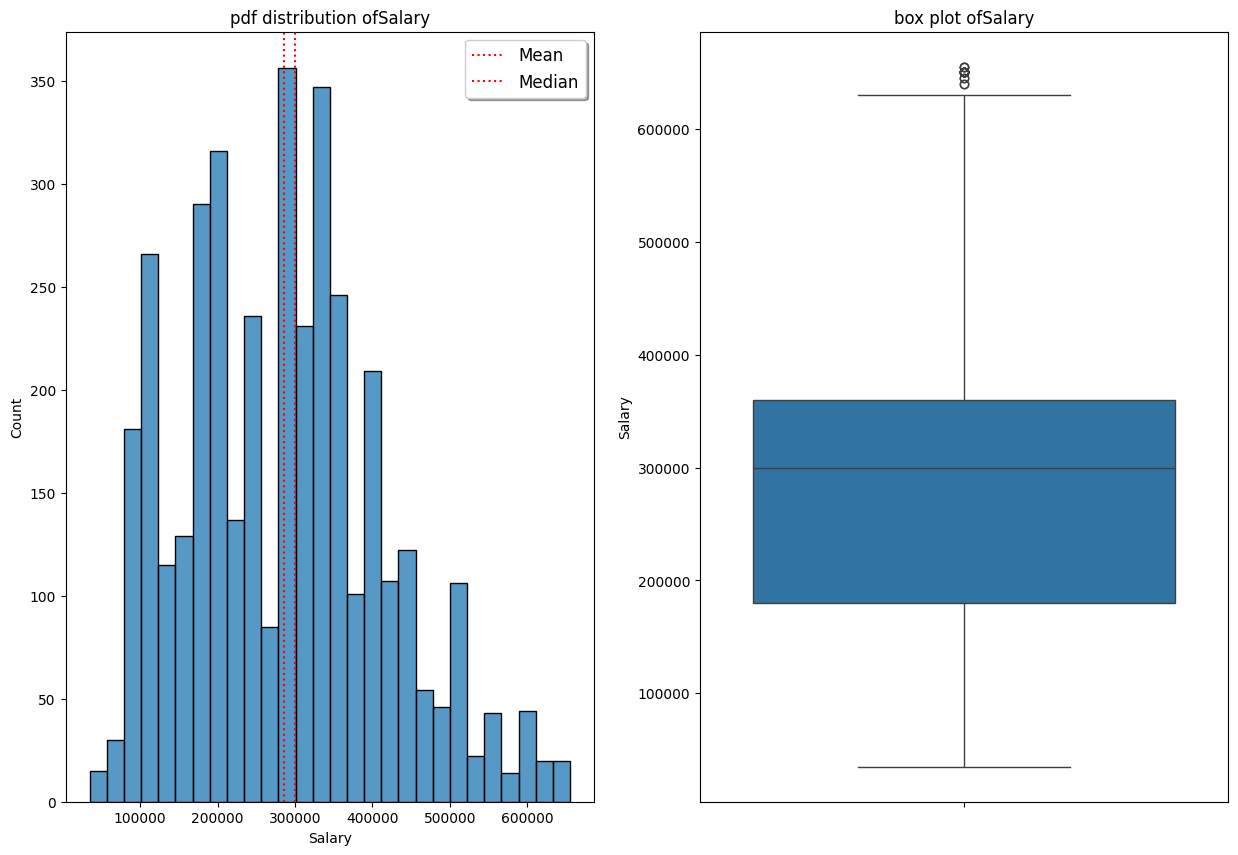

************************************************** The column Age **************************************************
 the mean :23.770576131687243
 the meadian : 24.0
 the skewness : 0.708140403076292
 the Kurtosis : 1.4540566335786793



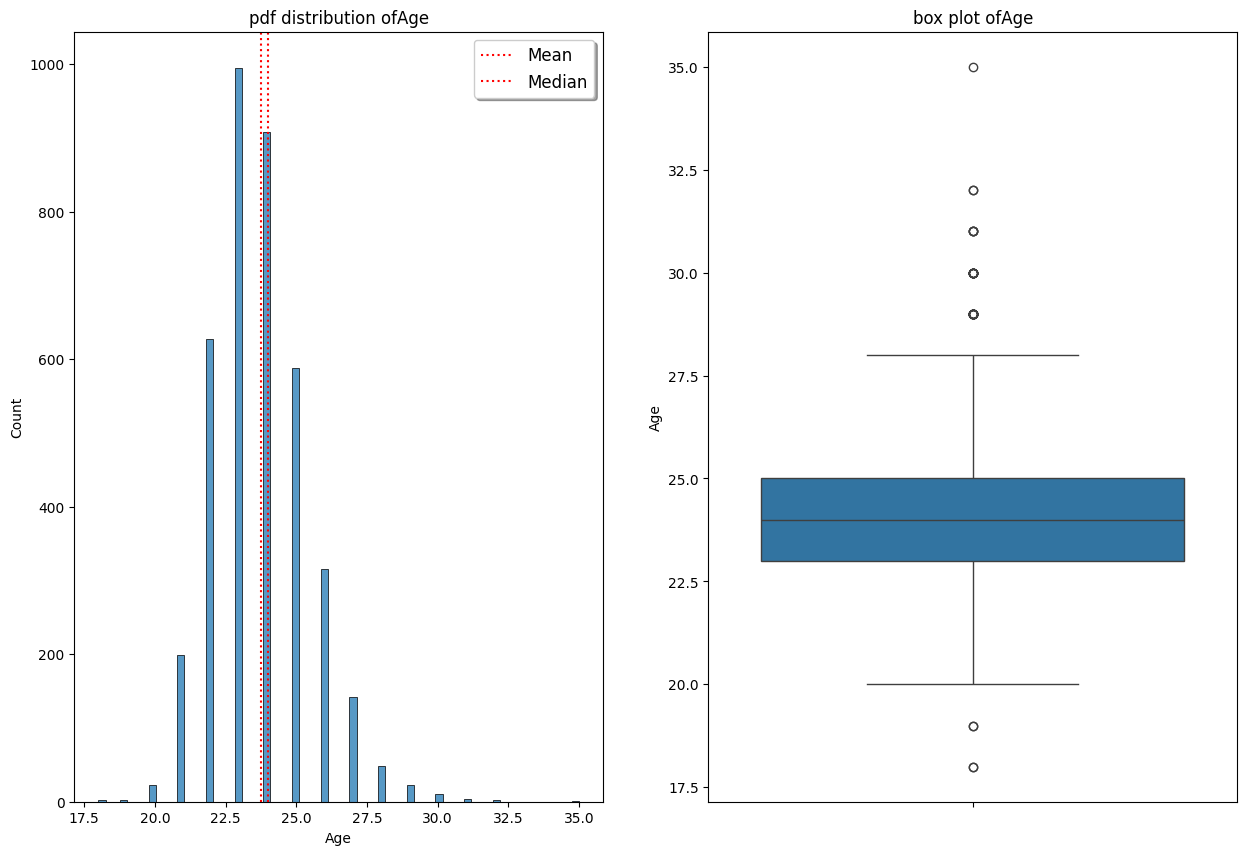

************************************************** The column 10percentage **************************************************
 the mean :77.85339506172839
 the meadian : 79.0
 the skewness : -0.586975559236215
 the Kurtosis : -0.10570688703285969



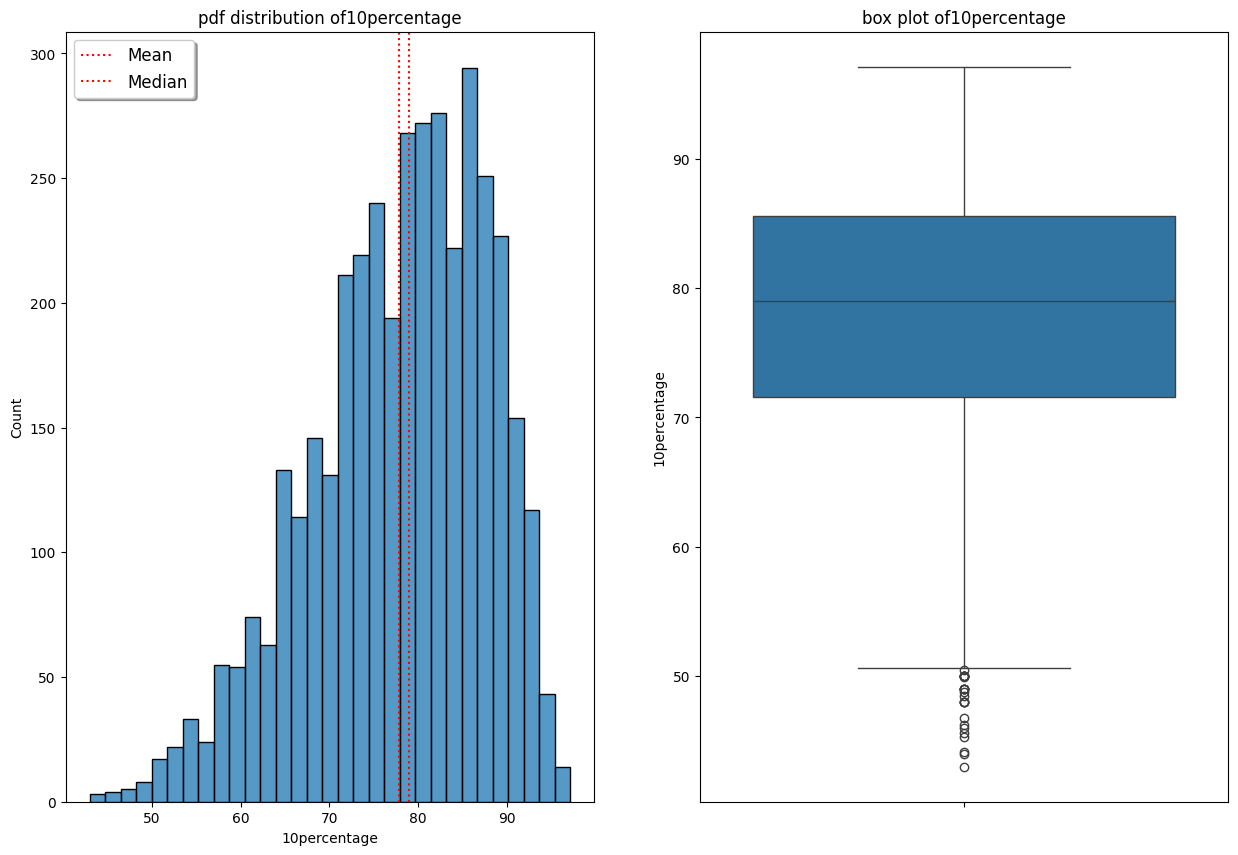

************************************************** The column 12graduation **************************************************
 the mean :2008.1213991769548
 the meadian : 2008.0
 the skewness : -0.9899043266710928
 the Kurtosis : 2.1595444504439443



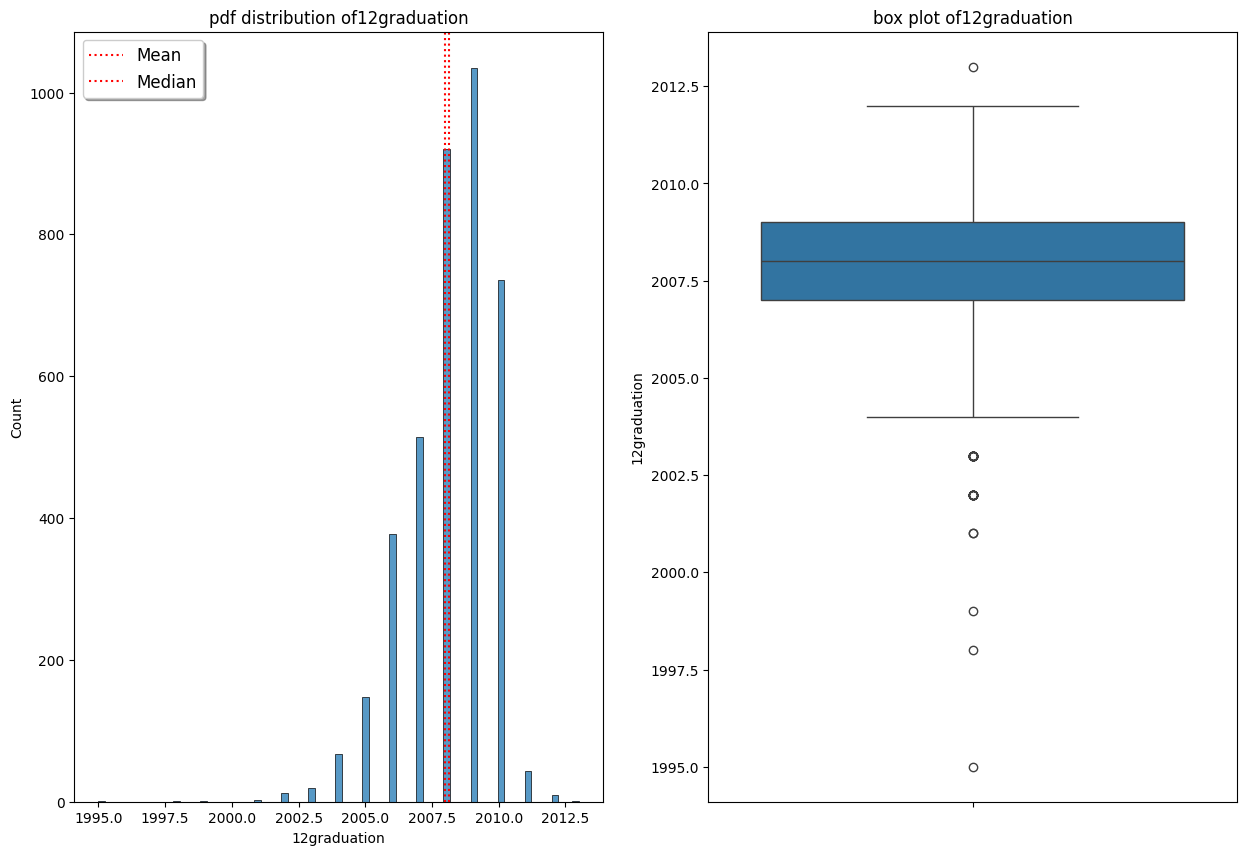

************************************************** The column 12percentage **************************************************
 the mean :74.41832304526748
 the meadian : 74.3
 the skewness : -0.02720200111409848
 the Kurtosis : -0.6233314237491192



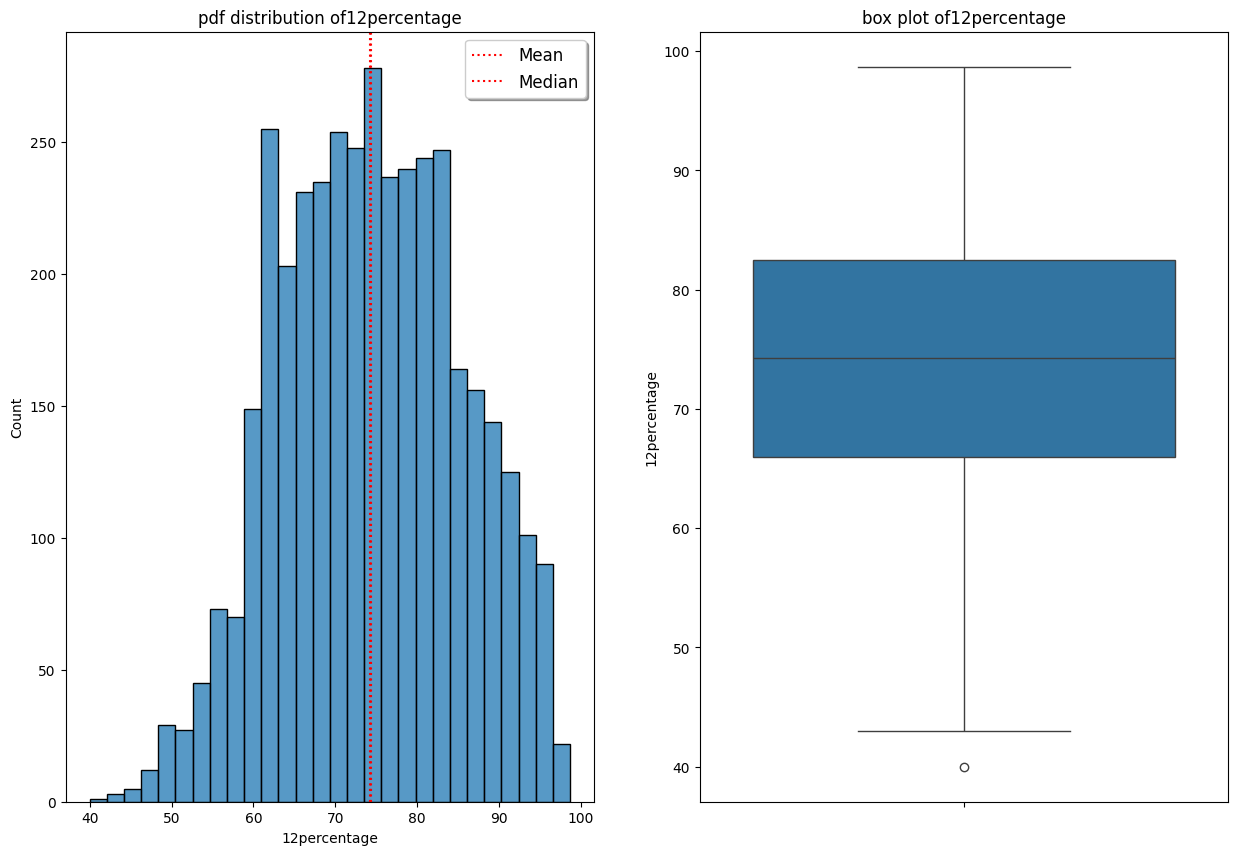

************************************************** The column CollegeTier **************************************************
 the mean :1.9323559670781894
 the meadian : 2.0
 the skewness : -3.4445574425560075
 the Kurtosis : 9.87005289876616



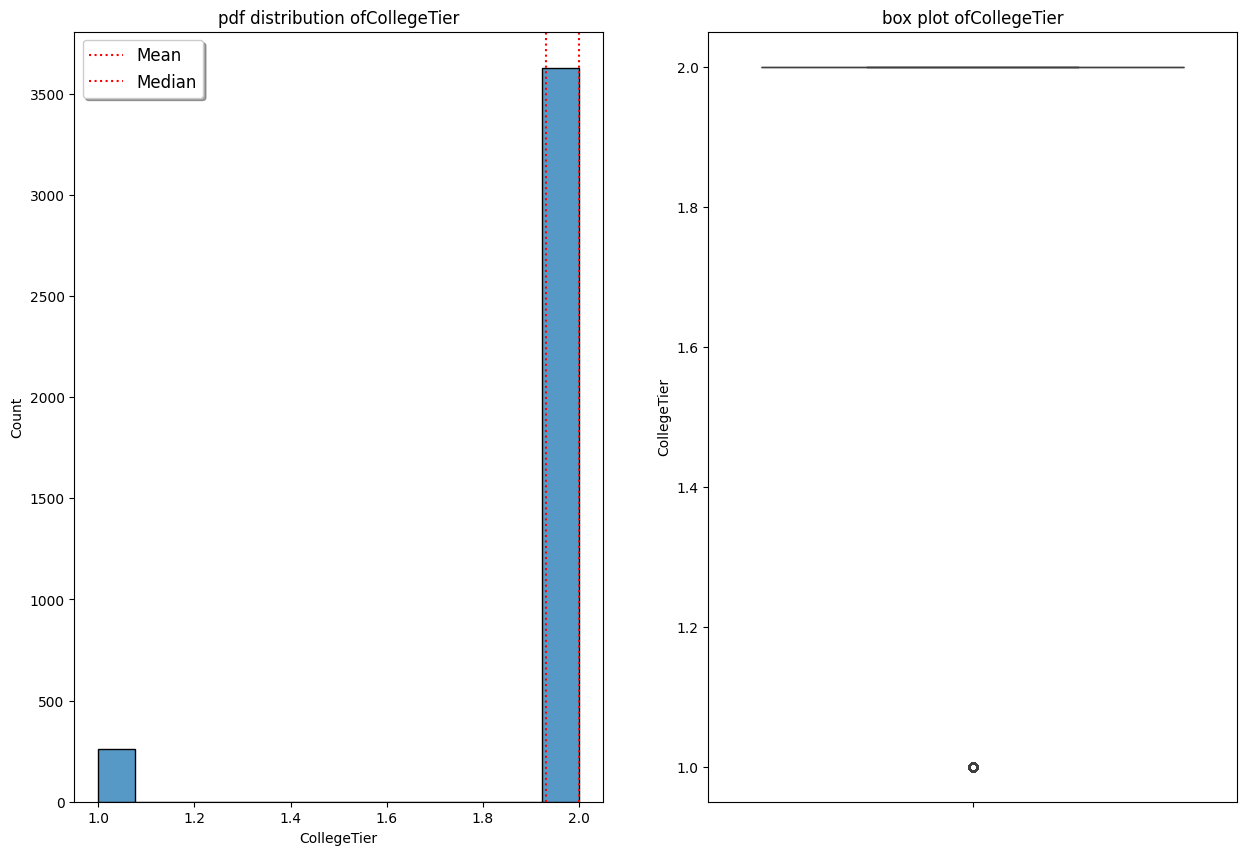

************************************************** The column collegeGPA **************************************************
 the mean :71.4276440329218
 the meadian : 71.67500000000001
 the skewness : -1.2194677311066895
 the Kurtosis : 10.042525538749215



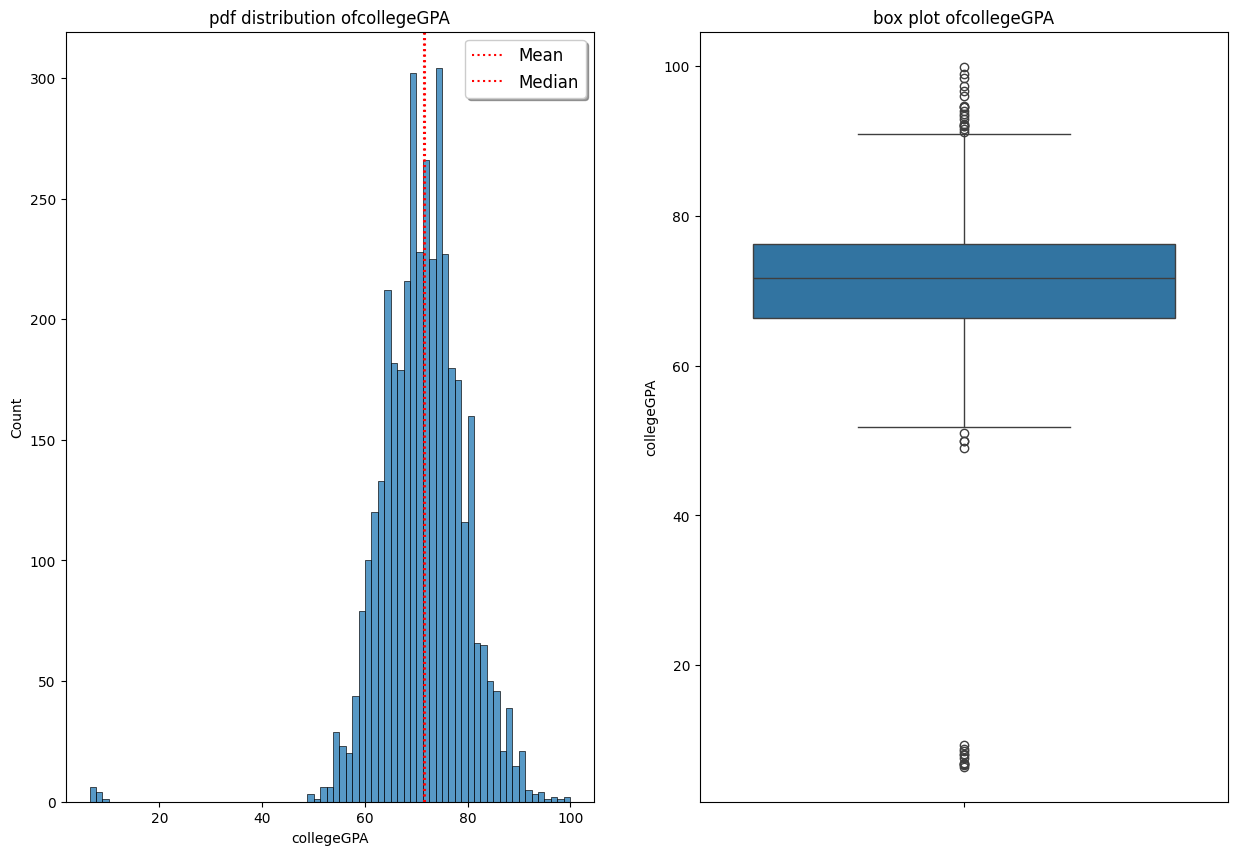

************************************************** The column GraduationYear **************************************************
 the mean :2012.6368312757202
 the meadian : 2013.0
 the skewness : -0.4162004076828834
 the Kurtosis : -0.17671911428980014



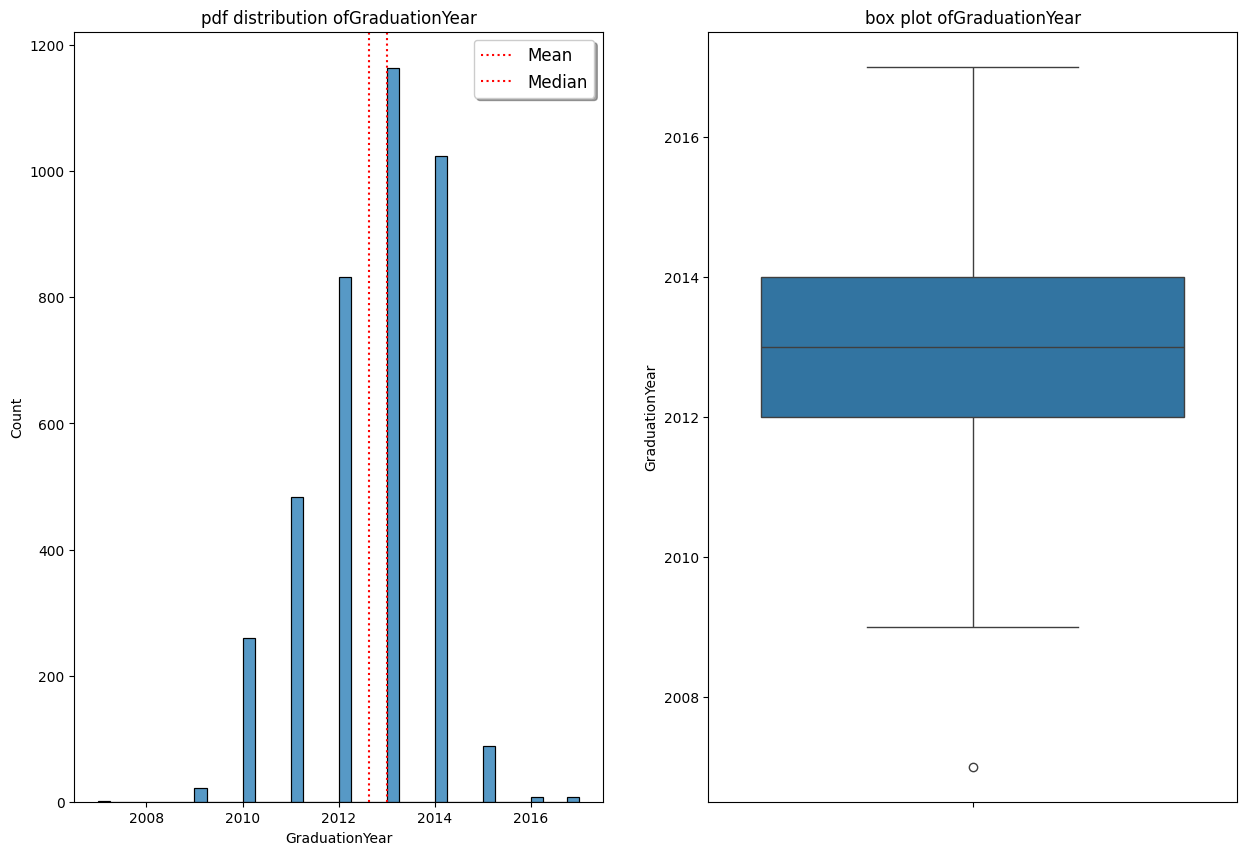

************************************************** The column English **************************************************
 the mean :500.55555555555554
 the meadian : 500.0
 the skewness : 0.19882342234108258
 the Kurtosis : -0.24193549378418844



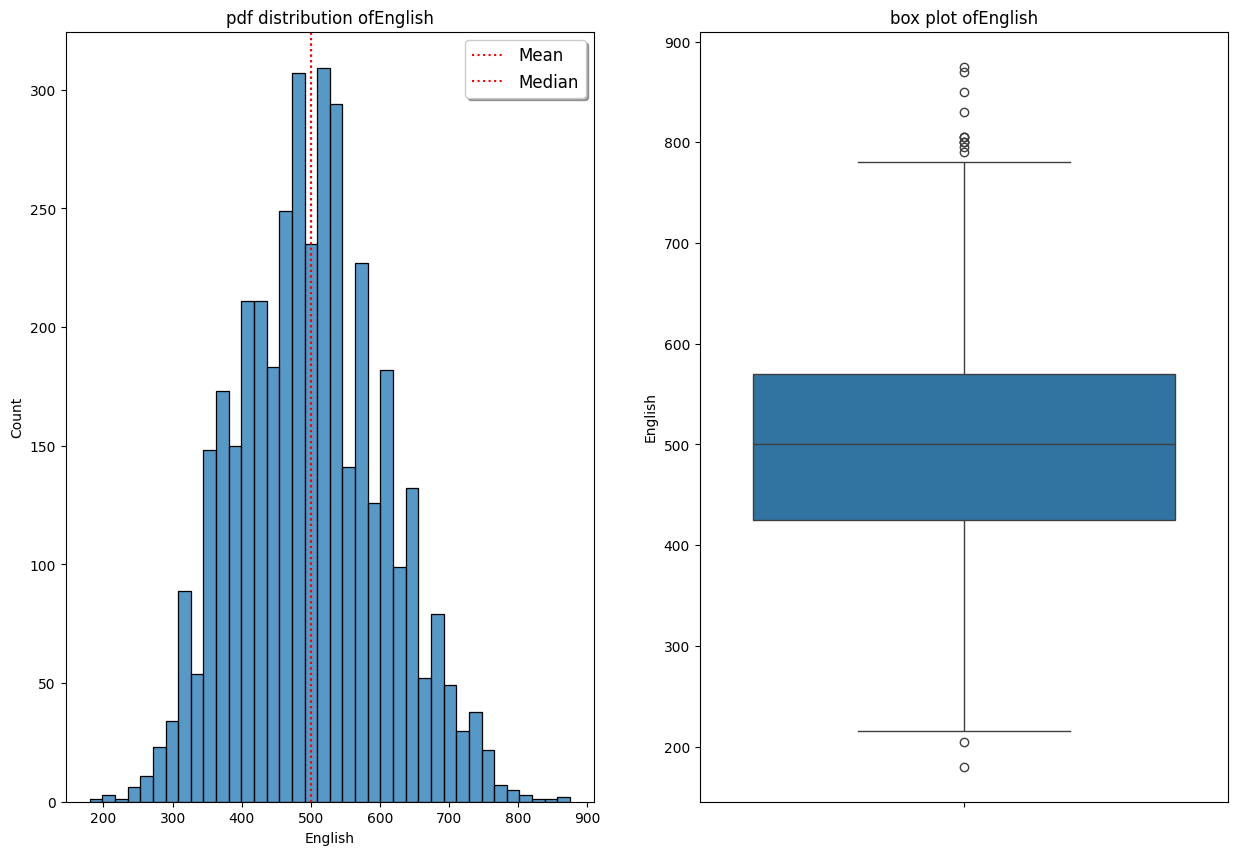

************************************************** The column Logical **************************************************
 the mean :500.744341563786
 the meadian : 505.0
 the skewness : -0.2235871292586892
 the Kurtosis : -0.2090963377780759



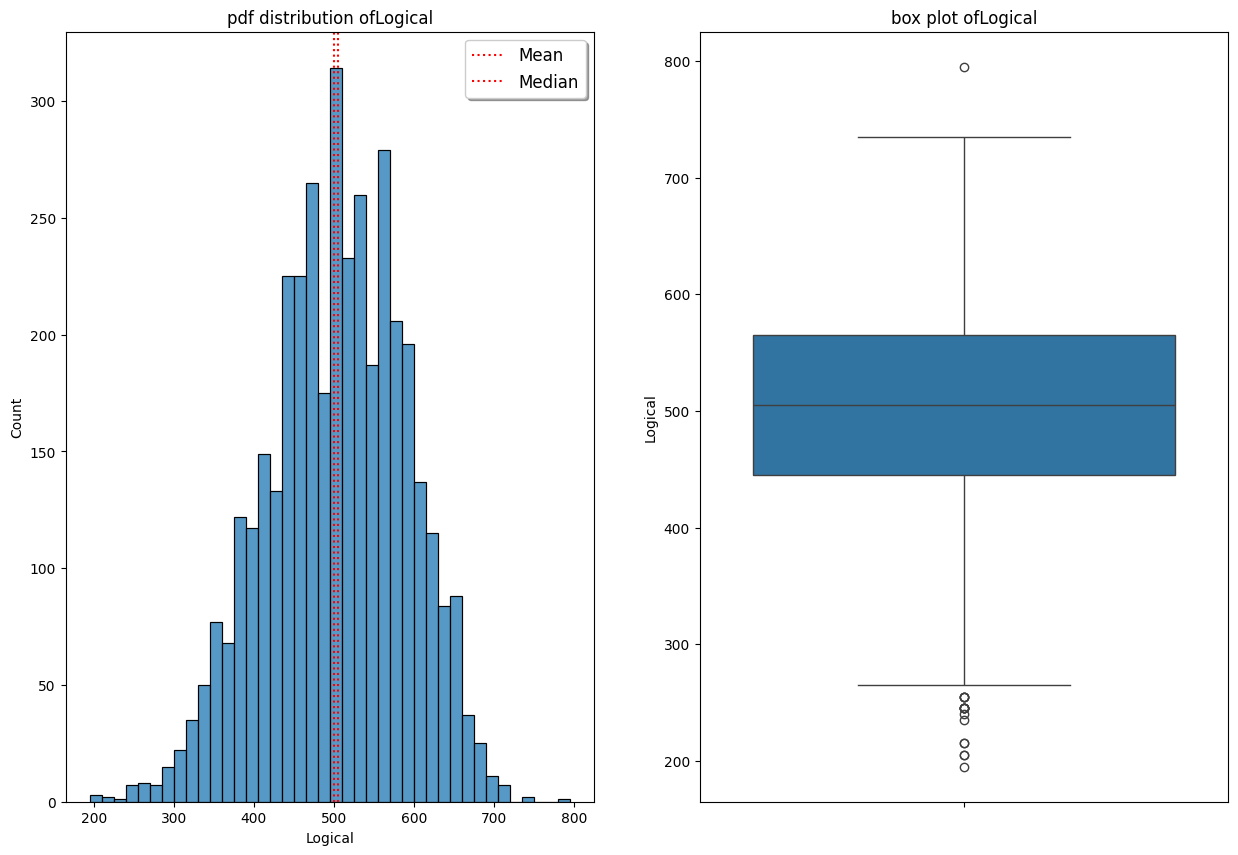

************************************************** The column Quant **************************************************
 the mean :511.56430041152265
 the meadian : 515.0
 the skewness : -0.01512185534106514
 the Kurtosis : -0.08876731553282458



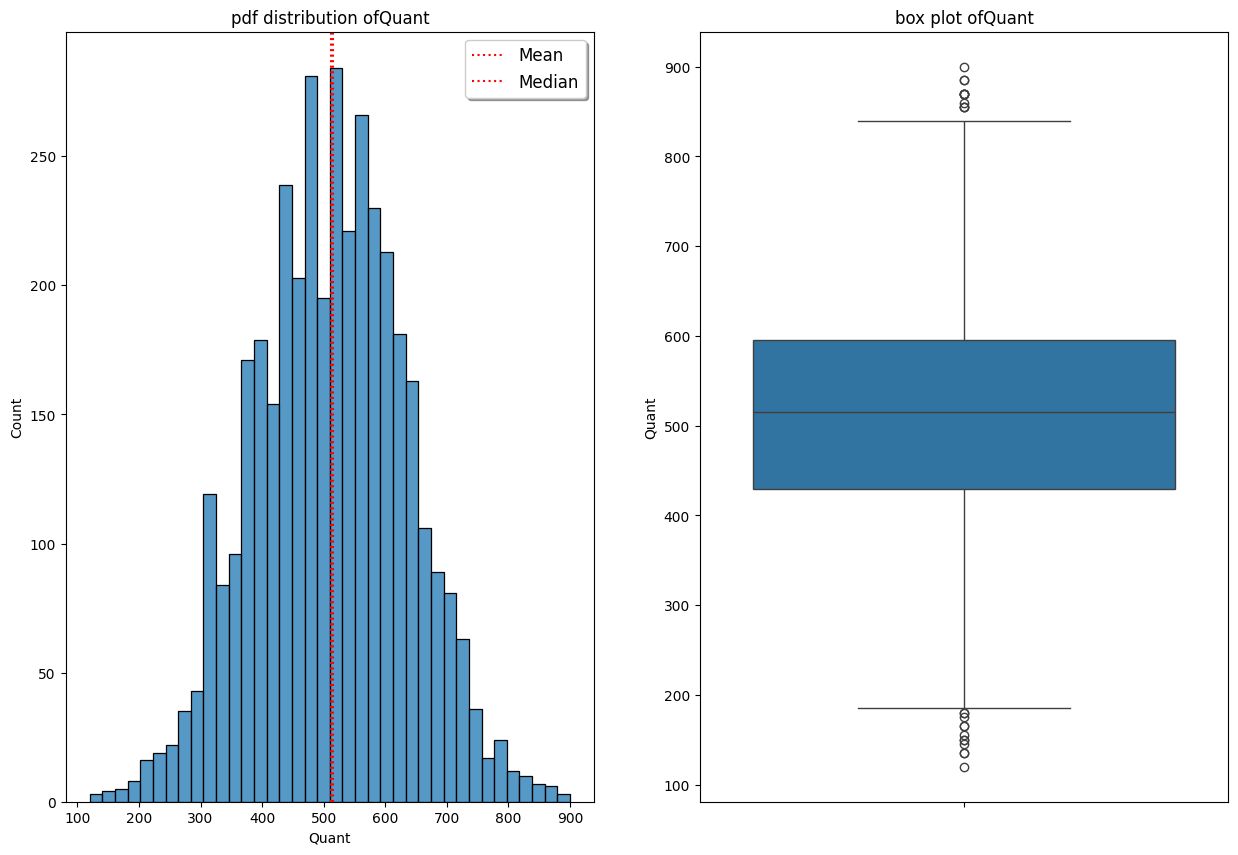

************************************************** The column Domain **************************************************
 the mean :0.6058773972647115
 the meadian : 0.6359787565
 the skewness : -0.37148422749098015
 the Kurtosis : -0.9714153455345014



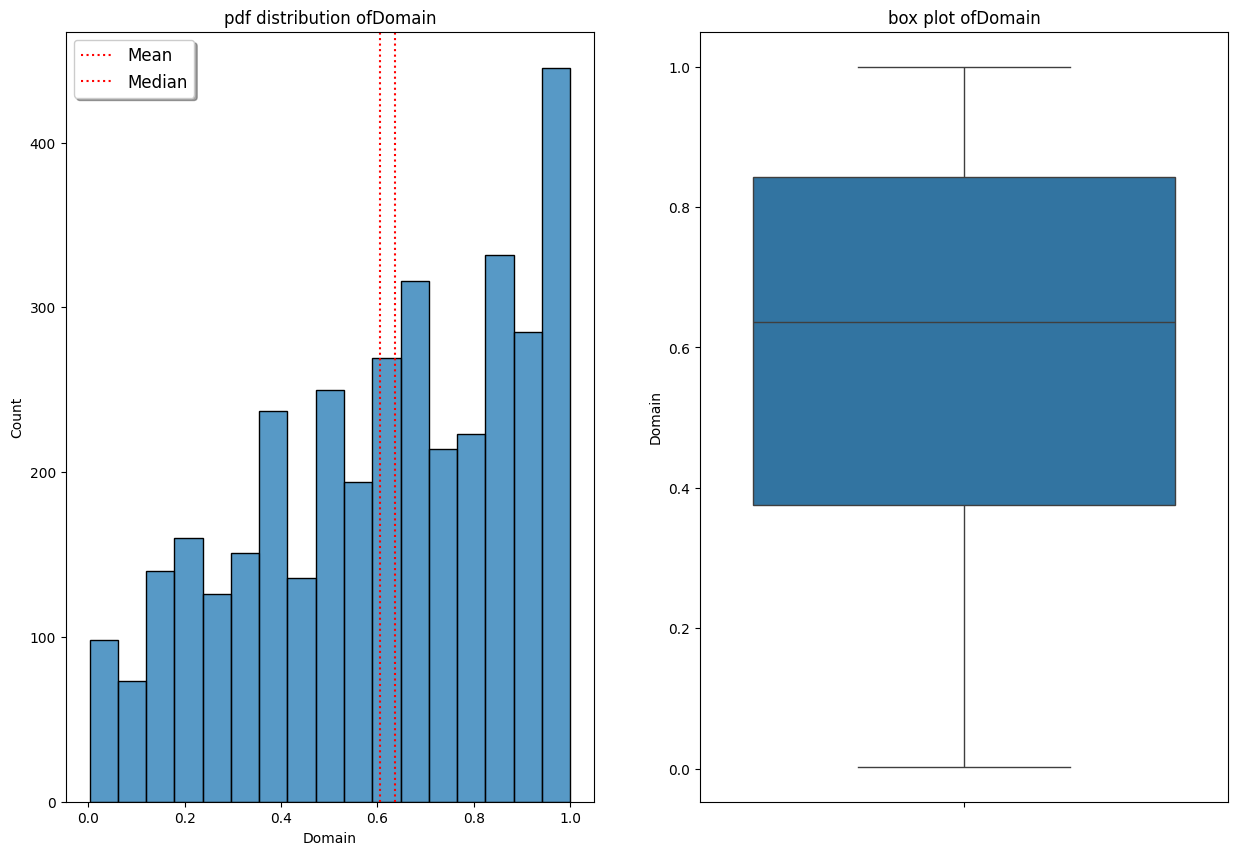

************************************************** The column ComputerProgramming **************************************************
 the mean :450.34264126149804
 the meadian : 445.0
 the skewness : -0.00529561028413348
 the Kurtosis : 0.39735650301704784



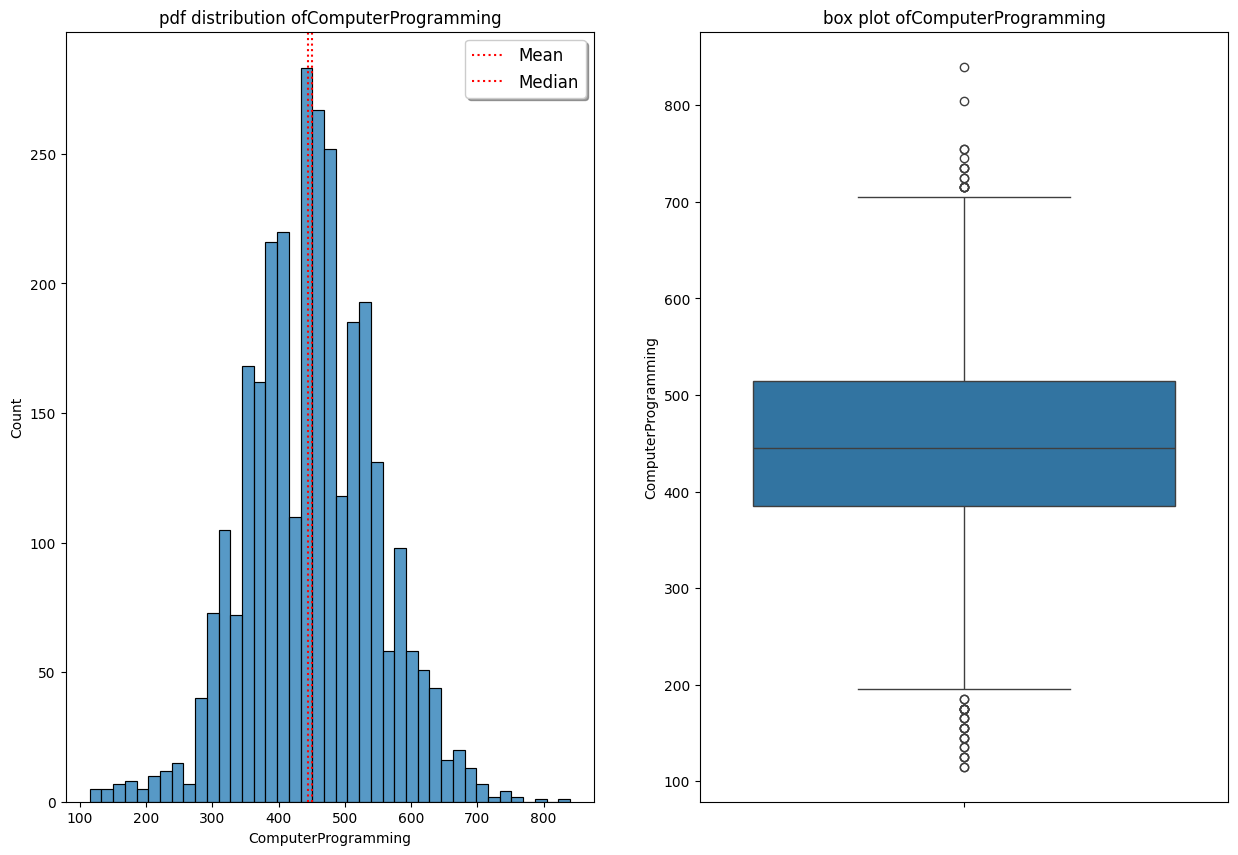

************************************************** The column ElectronicsAndSemicon **************************************************
 the mean :335.2446428571429
 the meadian : 333.0
 the skewness : 0.28912891914490607
 the Kurtosis : -0.0241352614497905



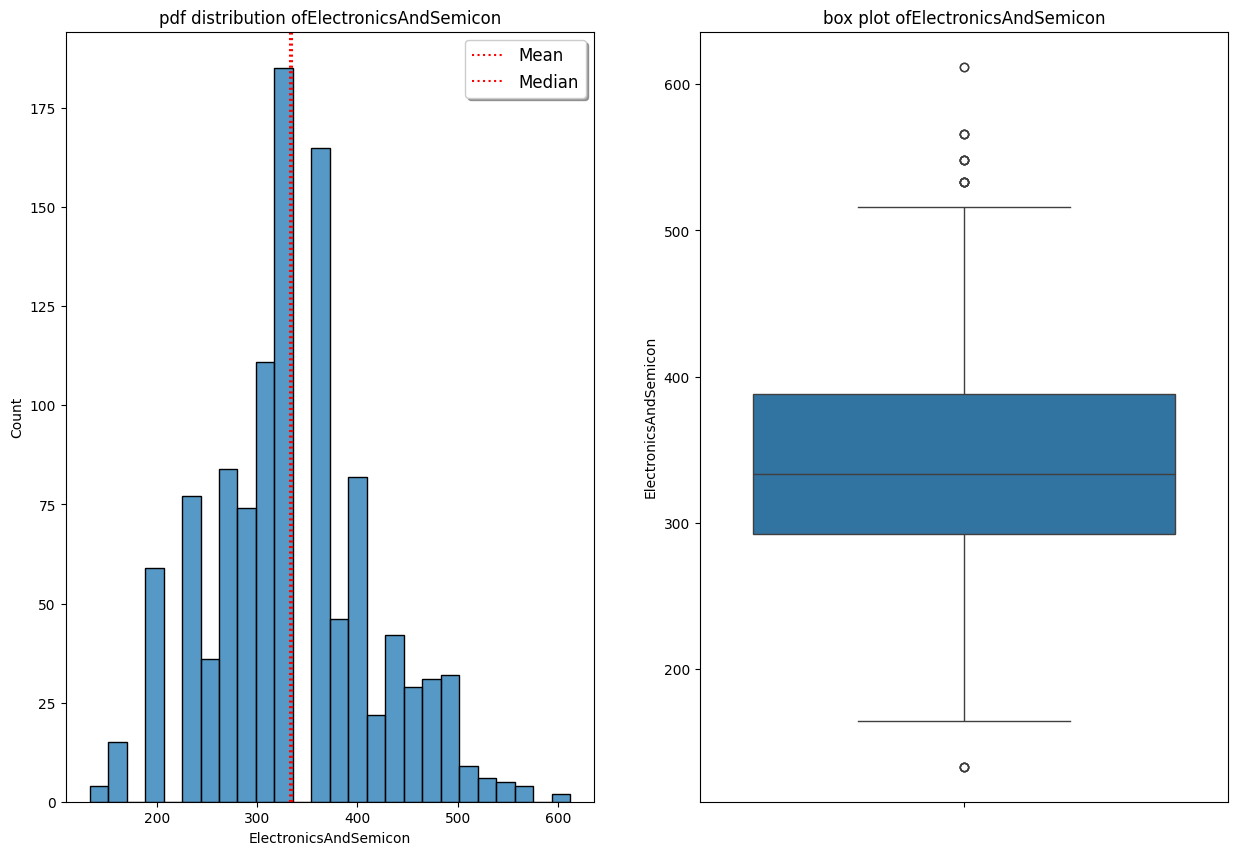

************************************************** The column ComputerScience **************************************************
 the mean :405.1324354657688
 the meadian : 407.0
 the skewness : 0.37203065592873585
 the Kurtosis : 0.22616417050178406



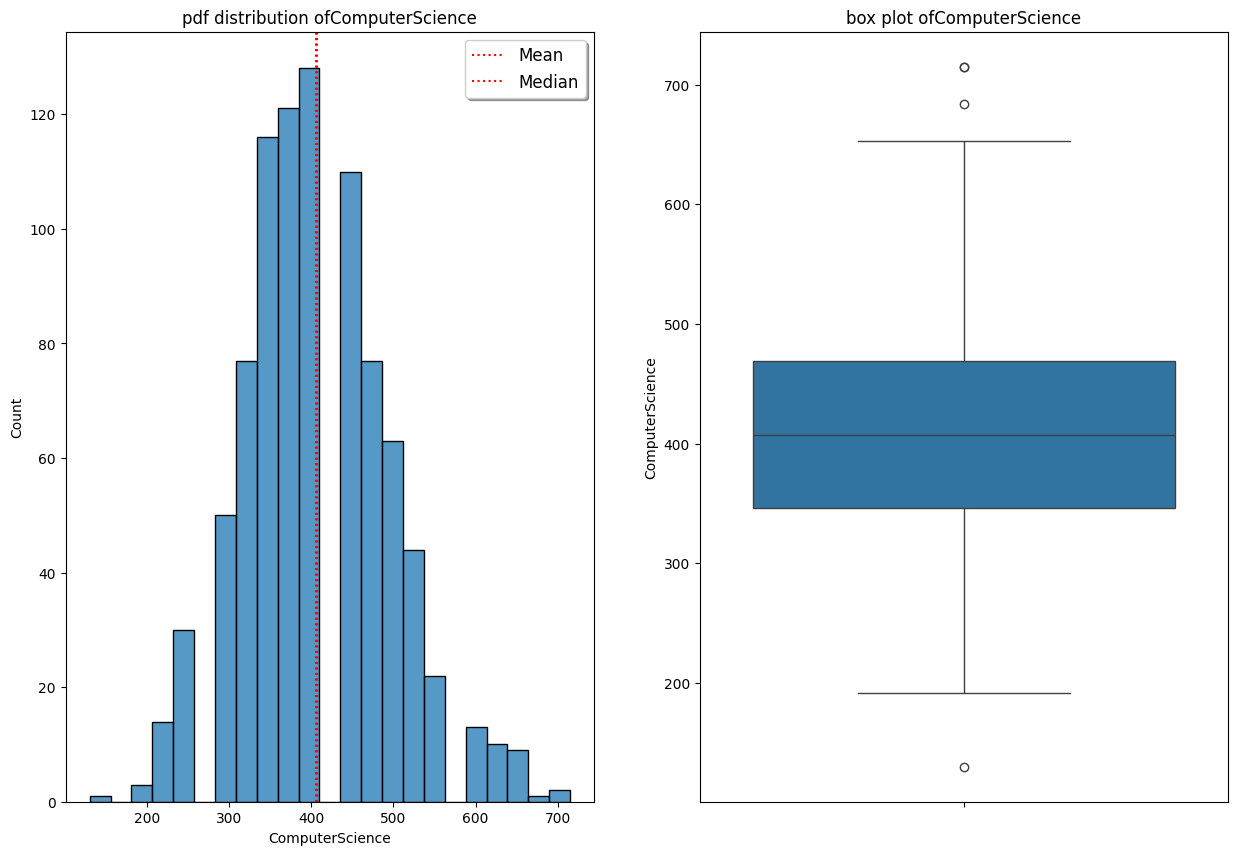

************************************************** The column MechanicalEngg **************************************************
 the mean :405.59276018099547
 the meadian : 407.0
 the skewness : 0.2327528771399083
 the Kurtosis : 0.06258411194480606



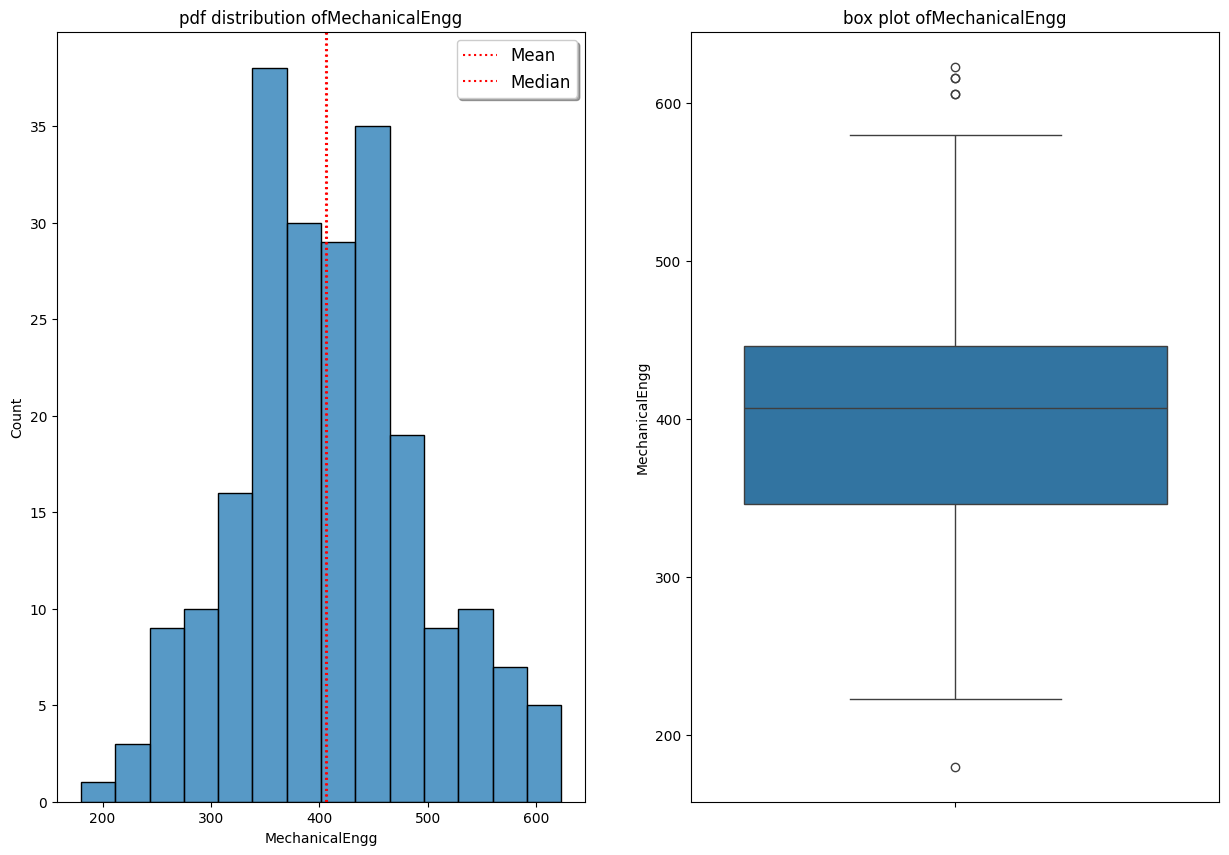

************************************************** The column ElectricalEngg **************************************************
 the mean :432.95625
 the meadian : 426.5
 the skewness : 0.1724122030336762
 the Kurtosis : -0.28556806221692455



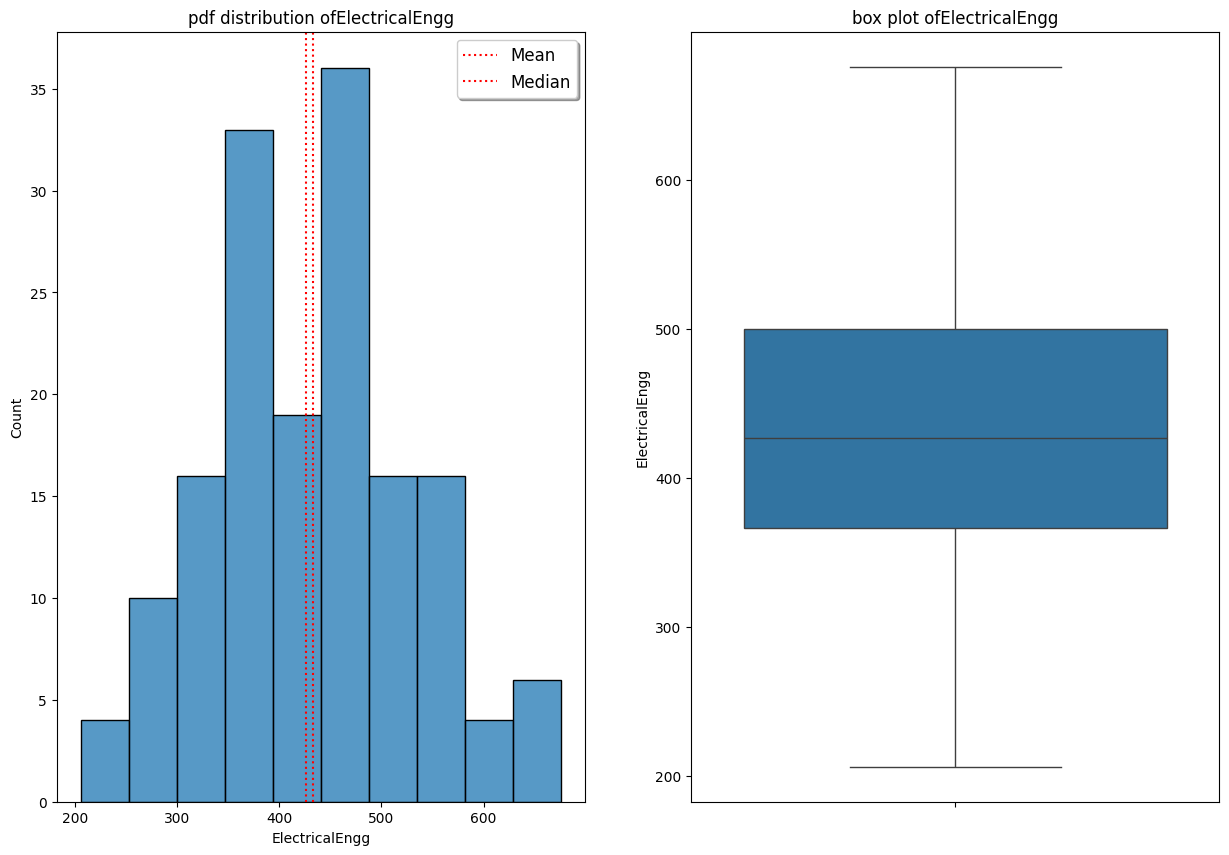

************************************************** The column TelecomEngg **************************************************
 the mean :349.8274932614555
 the meadian : 356.0
 the skewness : 0.20859877538123722
 the Kurtosis : -0.2845664612203458



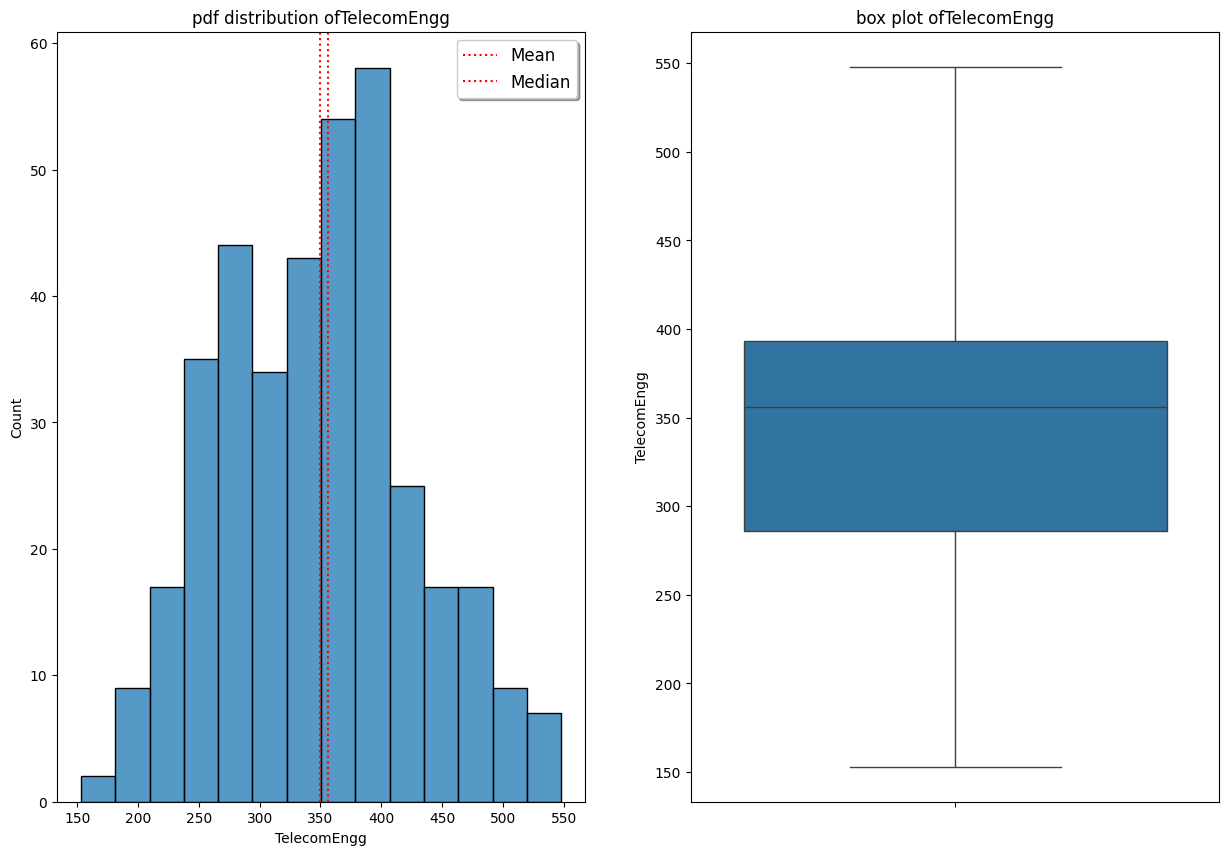

************************************************** The column CivilEngg **************************************************
 the mean :339.6111111111111
 the meadian : 340.0
 the skewness : 0.20270750035736718
 the Kurtosis : 0.6375972048704694



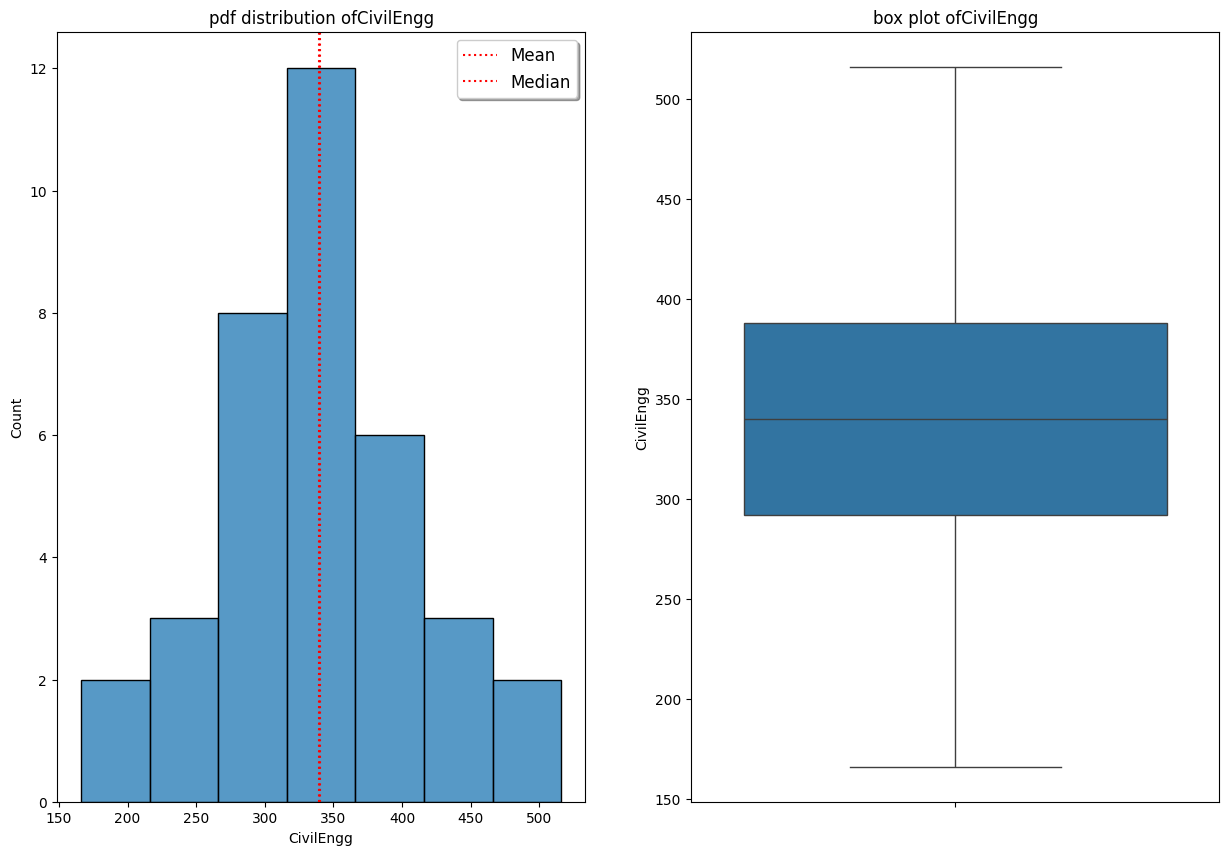

************************************************** The column Total_Score **************************************************
 the mean :619.9644667239246
 the meadian : 575.9421165515
 the skewness : 0.2811847167877781
 the Kurtosis : 0.15579746135358574



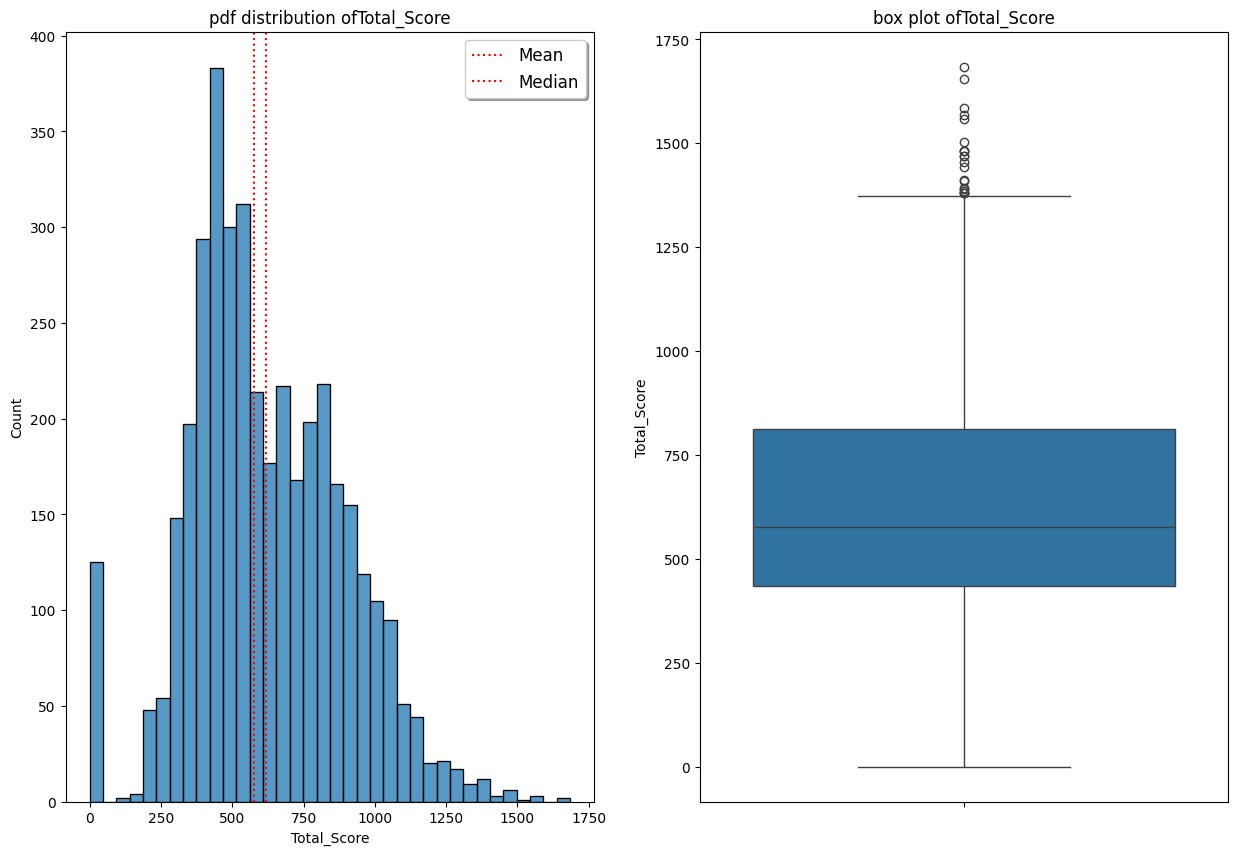

In [36]:
num_df= cleaned_df.select_dtypes(exclude=["object","datetime64[ns]"])
def uni(cleaned_df):
    for i in num_df.columns:
        print(f'{'*'*50} The column {i} {'*'*50}\n'
                f' the mean :{num_df[i].mean()}\n',
                f'the meadian : {num_df[i].median()}\n',
                f'the skewness : {num_df[i].skew()}\n',
                f'the Kurtosis : {num_df[i].kurt()}\n')
        plt.figure(figsize=(15,10))
        plt.subplot(1,2,1)
        plt.title(f"pdf distribution of{i}")
        sns.histplot(num_df[i])
        
        plt.axvline(num_df[i].mean(),color="r",linestyle=":",label="Mean")
        plt.axvline(num_df[i].median(),color="r",linestyle=":",label="Median")
        plt.legend(shadow=True,fontsize="larger")
    
        plt.subplot(1,2,2)
        plt.title(f"box plot of{i}")
        sns.boxplot(num_df[i])
        plt.show()
uni(cleaned_df)

Uni-variate in Categorical

************************************************** The column Designation **************************************************
 The number of uniqueness in the column: 416

 And the values : ['information technology specialist' 'site engineer'
 'graduate trainee engineer' 'quality assurance analyst' 'cnc programmer'
 'financial analyst' 'system engineer trainee' 'sap mm consultant'
 'assistant system engineer trainee' 'qa trainee' 'teradata developer'
 'hr executive' 'senior programmer' 'software test engineer (etl)'
 'associate software engg' 'supply chain analyst' 'sales trainer'
 'software executive' 'team leader' 'assistant system engineer - trainee'
 'seo analyst' 'risk investigator' 'executive administrative assistant'
 'program manager' 'r & d' 'sap functional consultant'
 'website developer/tester' 'software designer' 'sales coordinator'
 'qa engineer' 'aircraft technician' 'customer care executive'
 'senior test engineer' 'program analyst trainee'
 'electrical controls engineer'

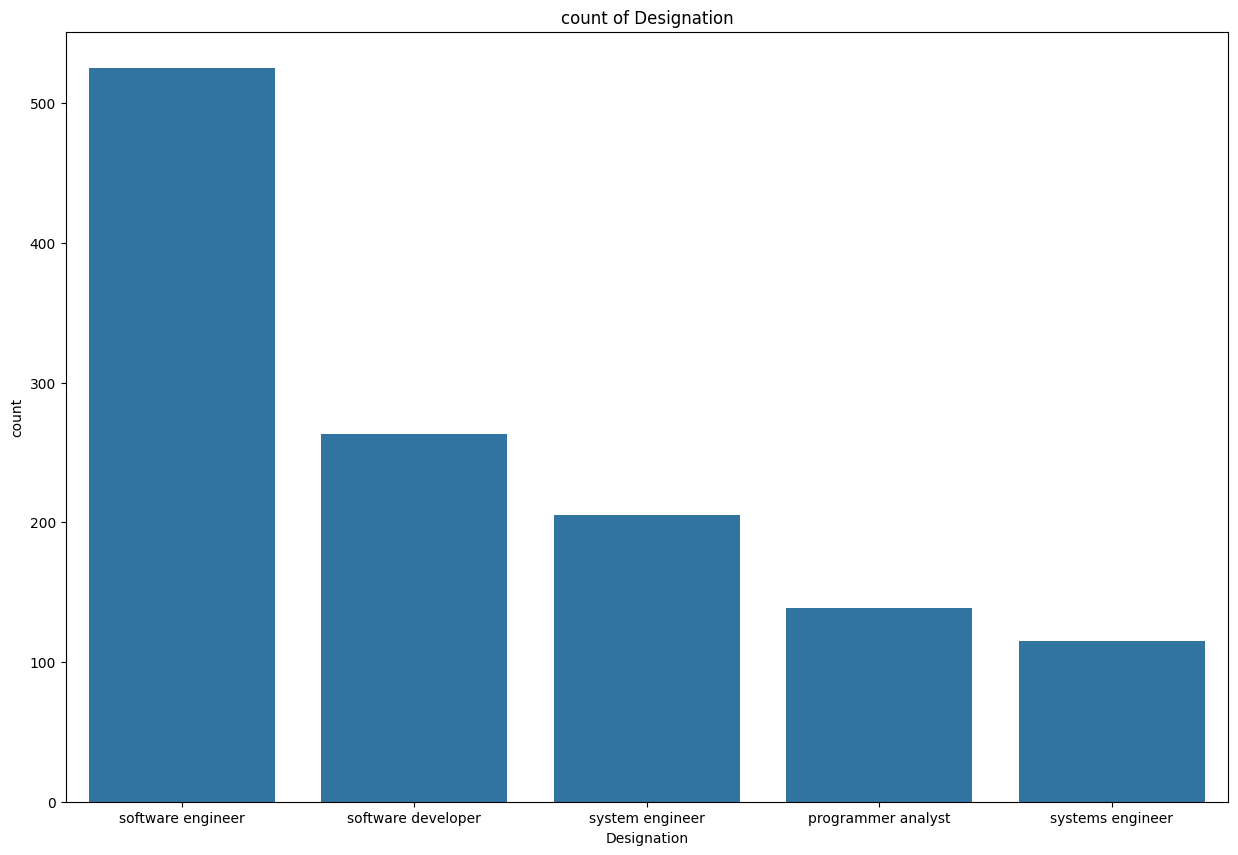

************************************************** The column JobCity **************************************************
 The number of uniqueness in the column: 231

 And the values : ['Nellore' 'Meerut' 'Sahibabad' 'Howrah' 'BHUBANESWAR' 'Trichur' 'Ambala'
 'Khopoli' 'keral' 'Roorkee' 'Allahabad' 'Delhi/NCR' 'Panchkula '
 'Panchkula' 'Ranchi ' 'Jalandhar' 'vapi' 'PILANI' 'muzzafarpur'
 'RAS AL KHAIMAH' 'bihar' 'singaruli' 'KANPUR' 'pondy' 'Mohali' 'Phagwara'
 'patna' 'Baripada' 'MEERUT' 'Yamuna Nagar' 'shahibabad' 'sampla'
 'Guwahati' 'Rourkela' 'Vellore' 'Dausa' 'latur (Maharashtra )' 'kanpur'
 'Mainpuri' 'karnal' 'Haldia' 'sambalpur' 'RAE BARELI' 'ranchi' 'Patiala'
 'Gorakhpur' 'Ambala City' 'Karad' 'Pilani' 'haryana']

The most frequent value :['Bangalore']
 And the Value Counts : JobCity
Bangalore     683
Noida         420
Hyderabad     371
Pune          327
Chennai       315
             ... 
Nanded          1
Dharmapuri      1
Vandavasi       1
Rohtak          1
haryana        

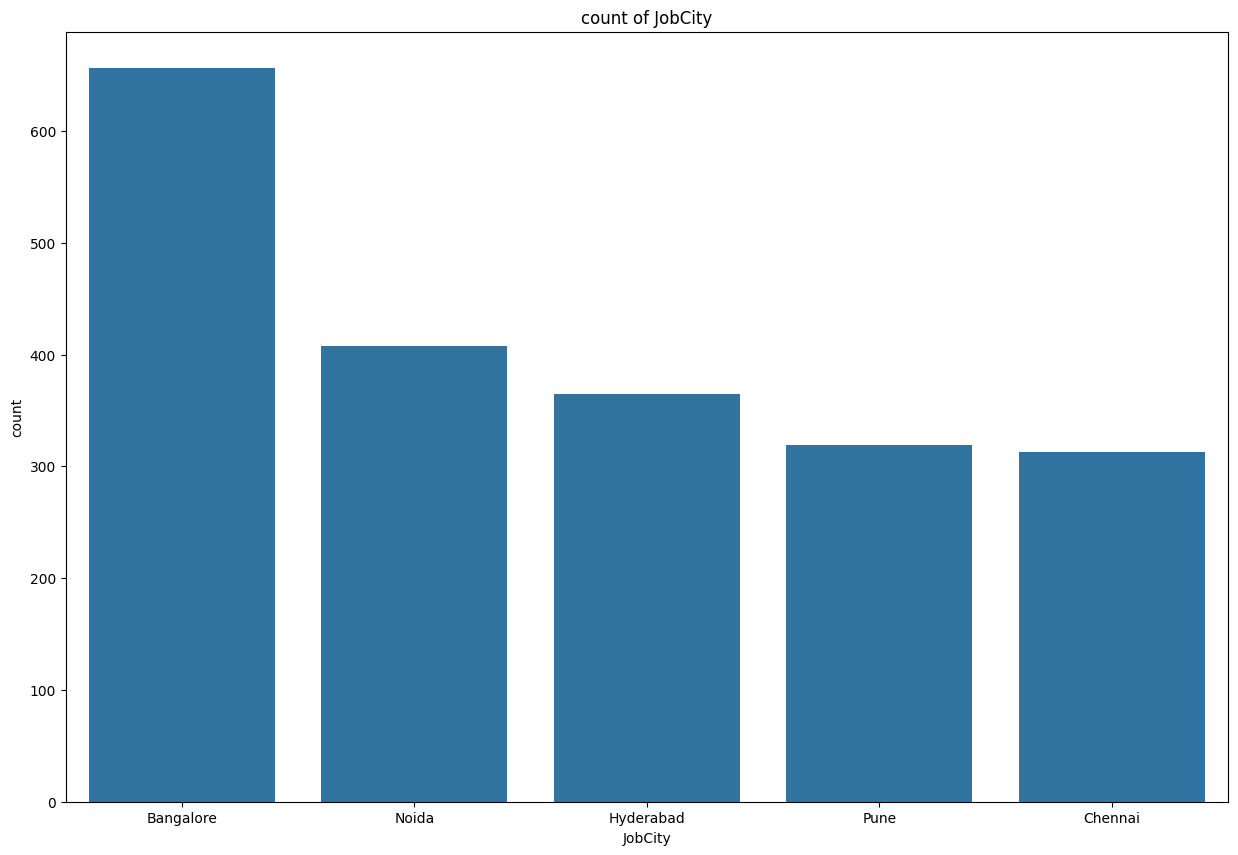

************************************************** The column Gender **************************************************
 The number of uniqueness in the column: 2

 And the values : ['f' 'm']

The most frequent value :['m']
 And the Value Counts : Gender
m    3040
f     957
Name: count, dtype: int64


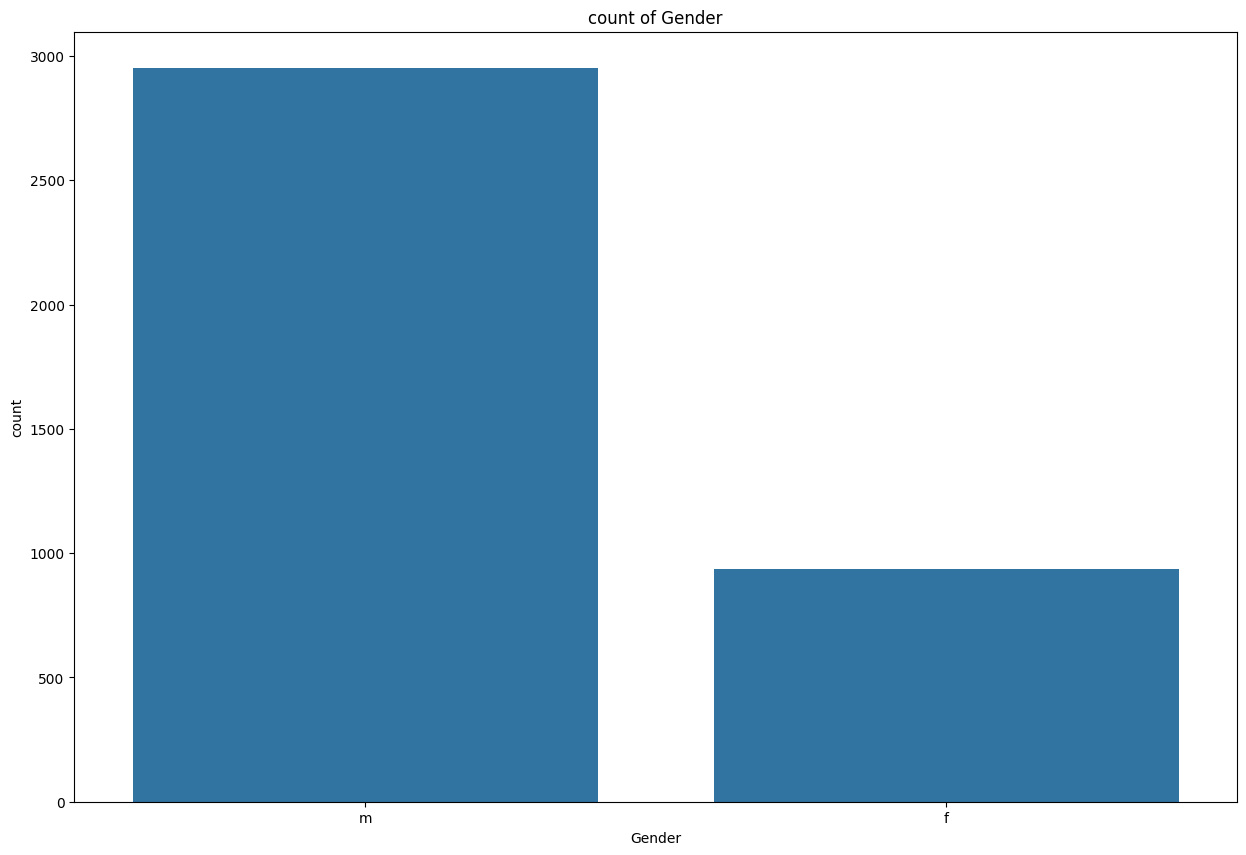

************************************************** The column 10board **************************************************
 The number of uniqueness in the column: 268

 And the values : ['icse board , new delhi' 'board of secondary education (bse) orissa'
 'maharashtra state board for ssc' 'board of secondary school education'
 'latur board' "stmary's convent inter college" 'nagpur divisional board'
 'ap state board' 'cgbse raipur' 'uttranchal board' 'jseb' 'ksbe'
 'central board of secondary education, new delhi'
 'bihar school examination board patna' 'cbse board' 'mp-bse' 'up bourd'
 'dav public school sec 14' 'board of school education haryana'
 'council for indian school certificate examination' 'aurangabad board'
 'j&k state board of school education'
 'maharashtra state board of secondary and higher secondary education'
 'maharashtra state boar of secondary and higher secondary education'
 'ssc regular' 'karnataka state examination board' 'nasik'
 'west bengal  board of secondary

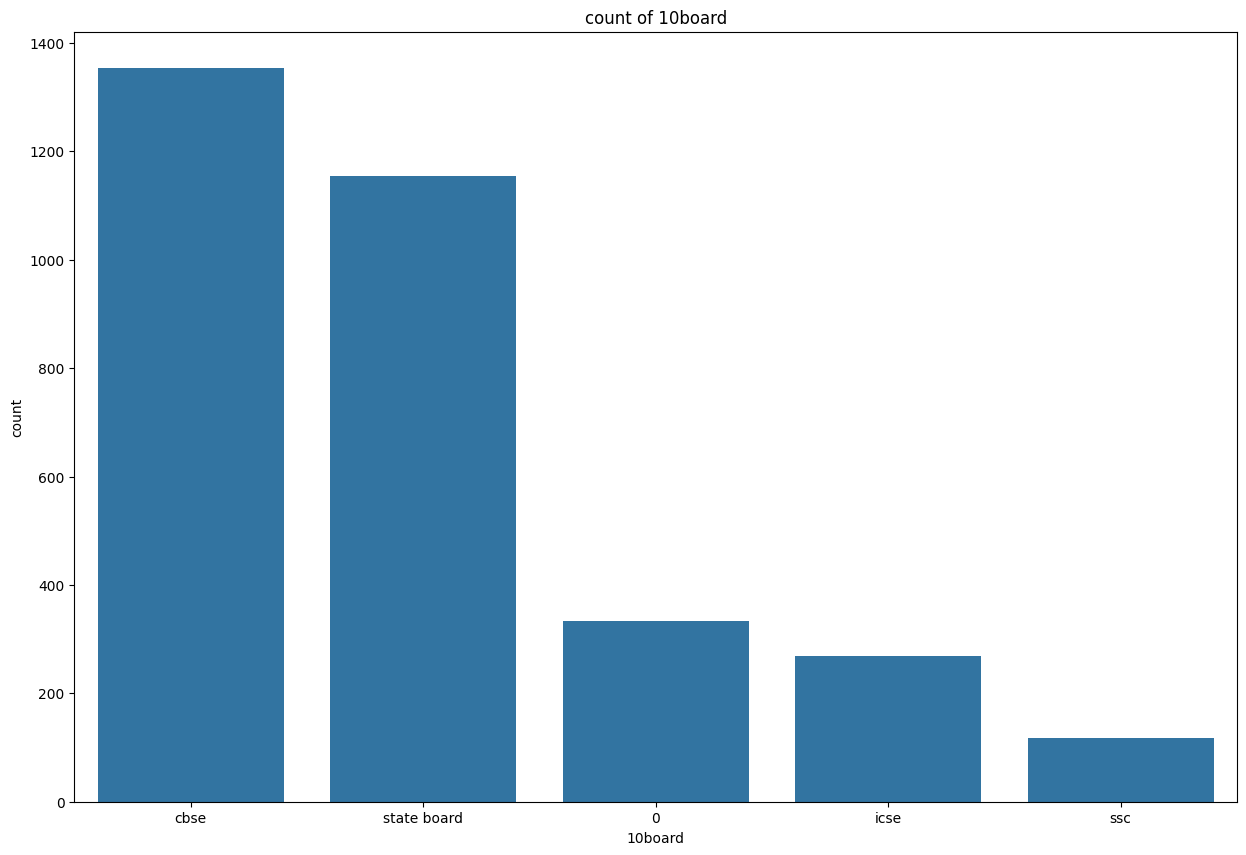

************************************************** The column 12board **************************************************
 The number of uniqueness in the column: 330

 And the values : ['uttranchal board' 'jiec'
 'central board of secondary education, new delhi'
 'bihar school examination board patna'
 'state board of technical education harayana' 'mp-bse' 'up bourd'
 'dav public school sec 14'
 'haryana state board of technical education chandigarh'
 'council for indian school certificate examination'
 'jaswant modern school' 'madhya pradesh open school' 'aurangabad board'
 'j&k state board of school education'
 'diploma ( maharashtra state board of technical education)'
 'board of technicaleducation ,delhi'
 'maharashtra state boar of secondary and higher secondary education'
 'karnataka state examination board' 'puboard' 'nasik'
 'west bengal board of higher secondary education' 'up board,allahabad'
 'board of intrmediate education,ap' 'cbese'
 'karnataka state pre- university board

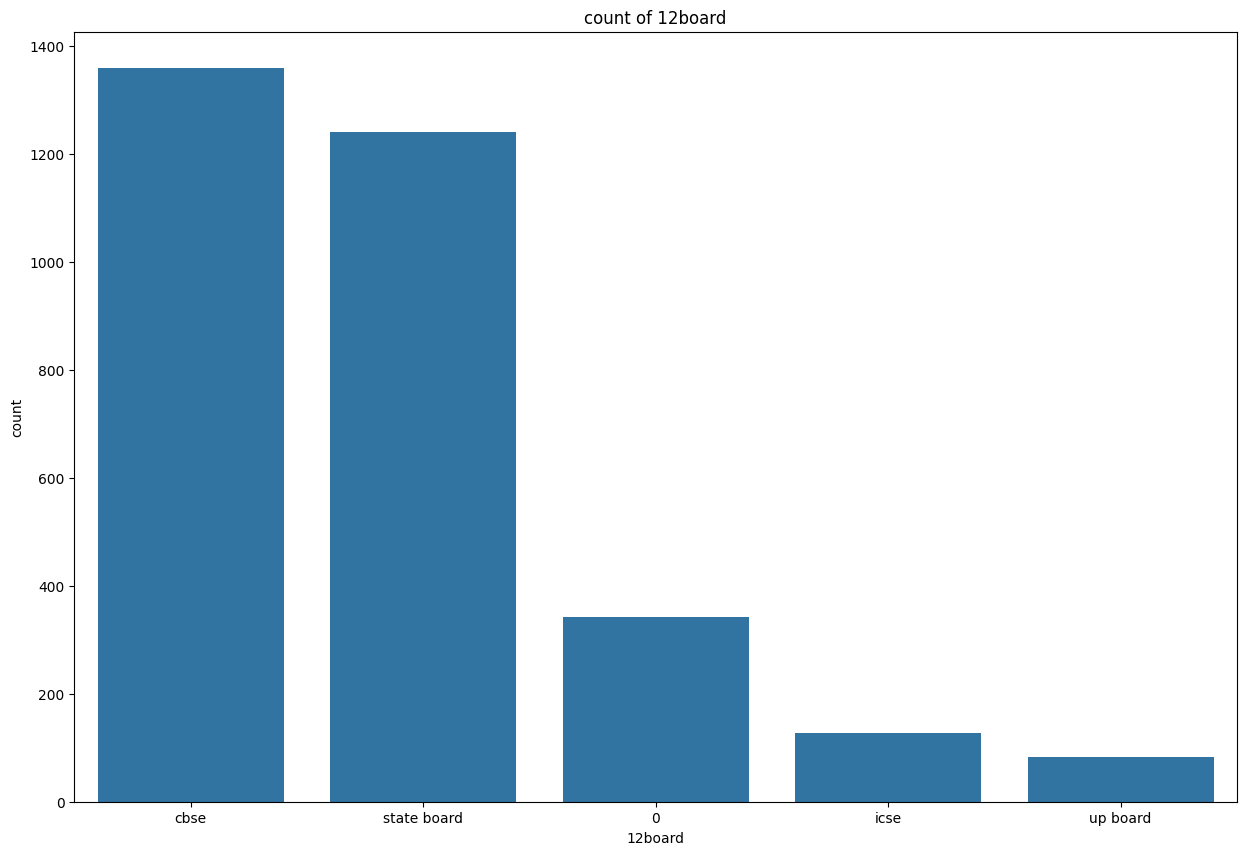

************************************************** The column Degree **************************************************
 The number of uniqueness in the column: 4

 And the values : ['B.Tech/B.E.' 'MCA' 'M.Tech./M.E.' 'M.Sc. (Tech.)']

The most frequent value :['B.Tech/B.E.']
 And the Value Counts : Degree
B.Tech/B.E.      3699
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64


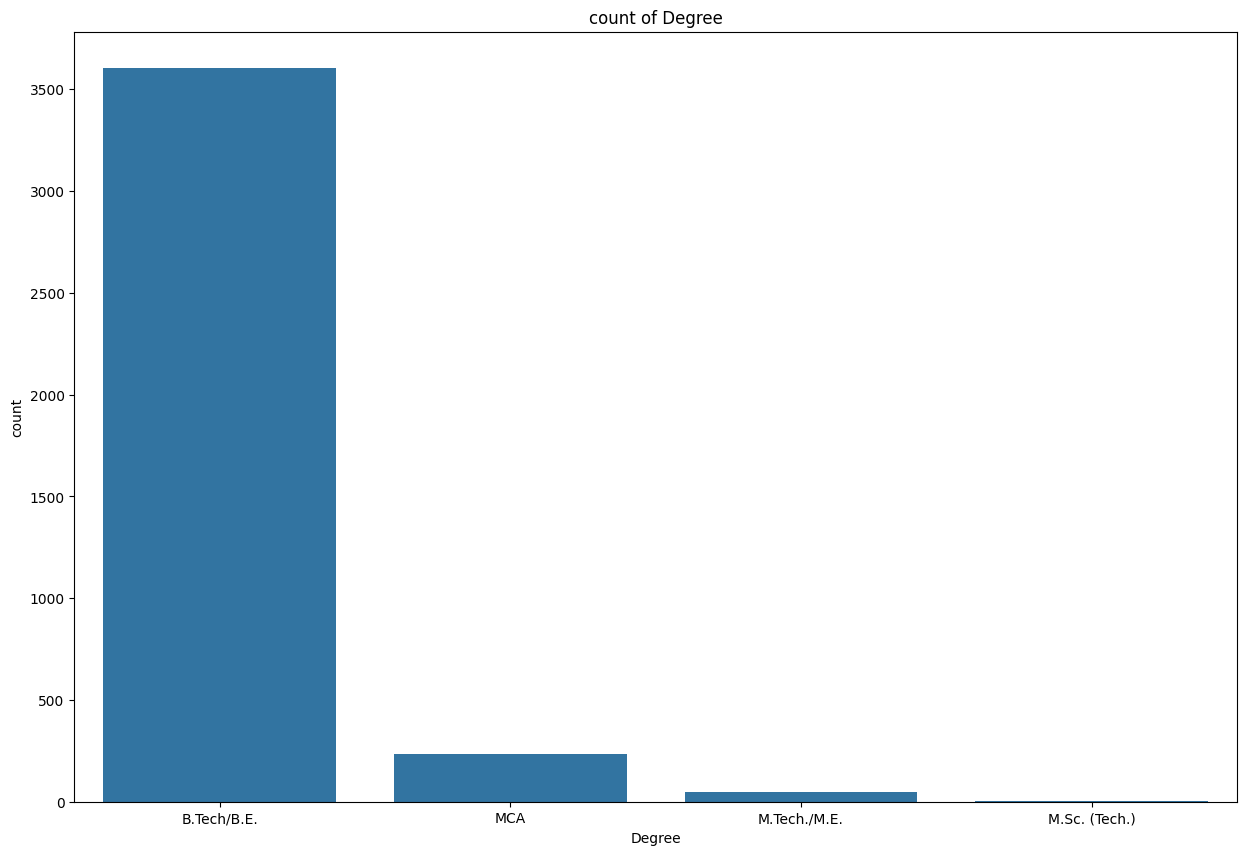

************************************************** The column Specialization **************************************************
 The number of uniqueness in the column: 45

 And the values : ['computer engineering' 'electronics and communication engineering'
 'information technology' 'computer science & engineering'
 'mechanical engineering' 'electronics and electrical engineering'
 'electronics & telecommunications'
 'instrumentation and control engineering' 'computer application'
 'electronics and computer engineering' 'electrical engineering'
 'applied electronics and instrumentation'
 'electronics & instrumentation eng' 'information science engineering'
 'civil engineering' 'mechanical and automation'
 'industrial & production engineering'
 'control and instrumentation engineering' 'metallurgical engineering'
 'electronics and instrumentation engineering' 'electronics engineering'
 'ceramic engineering' 'chemical engineering' 'aeronautical engineering'
 'other' 'biotechnology' 'emb

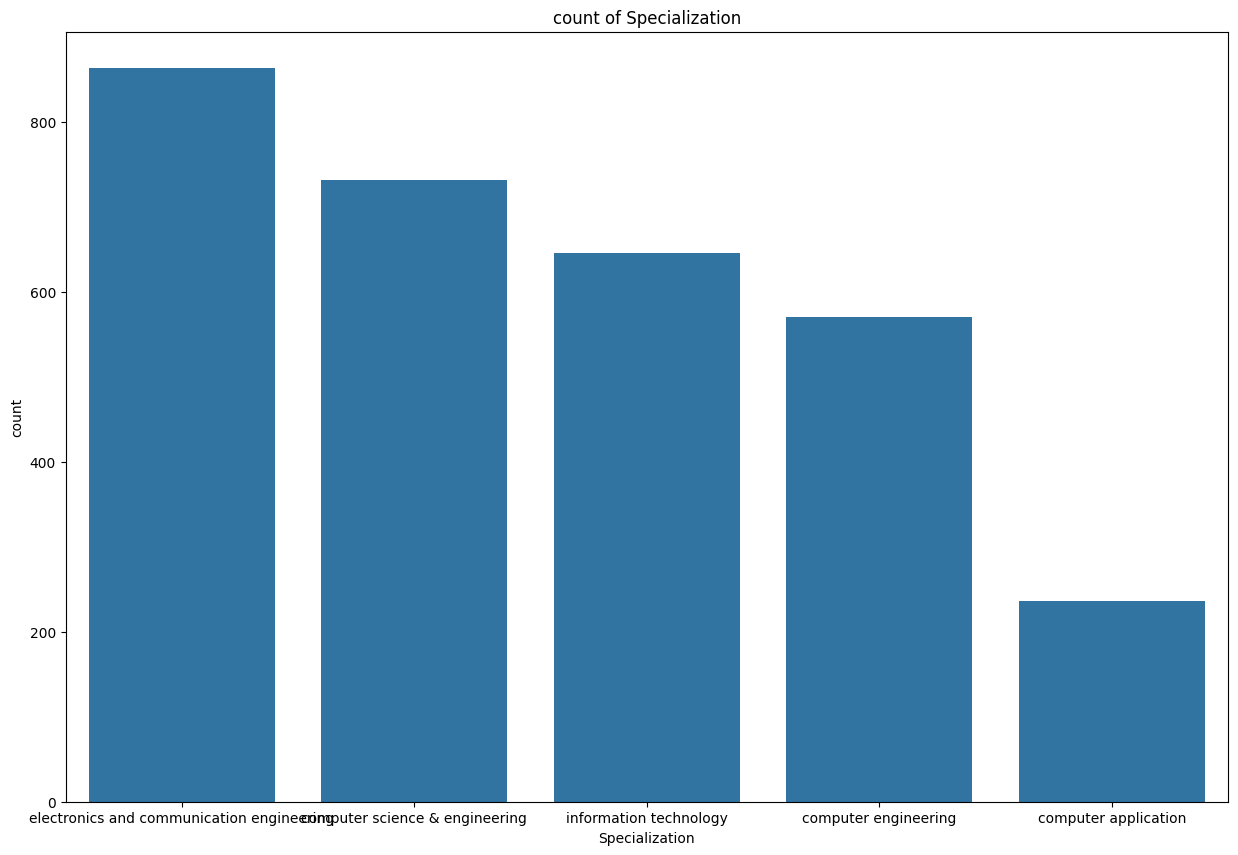

************************************************** The column CollegeState **************************************************
 The number of uniqueness in the column: 26

 And the values : ['Andhra Pradesh' 'Madhya Pradesh' 'Uttar Pradesh' 'Karnataka'
 'Tamil Nadu' 'Delhi' 'West Bengal' 'Maharashtra' 'Haryana' 'Telangana'
 'Orissa' 'Punjab' 'Kerala' 'Gujarat' 'Rajasthan' 'Chhattisgarh'
 'Uttarakhand' 'Jammu and Kashmir' 'Jharkhand' 'Himachal Pradesh' 'Bihar'
 'Assam' 'Goa' 'Sikkim' 'Union Territory' 'Meghalaya']

The most frequent value :['Uttar Pradesh']
 And the Value Counts : CollegeState
Uttar Pradesh        914
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
C

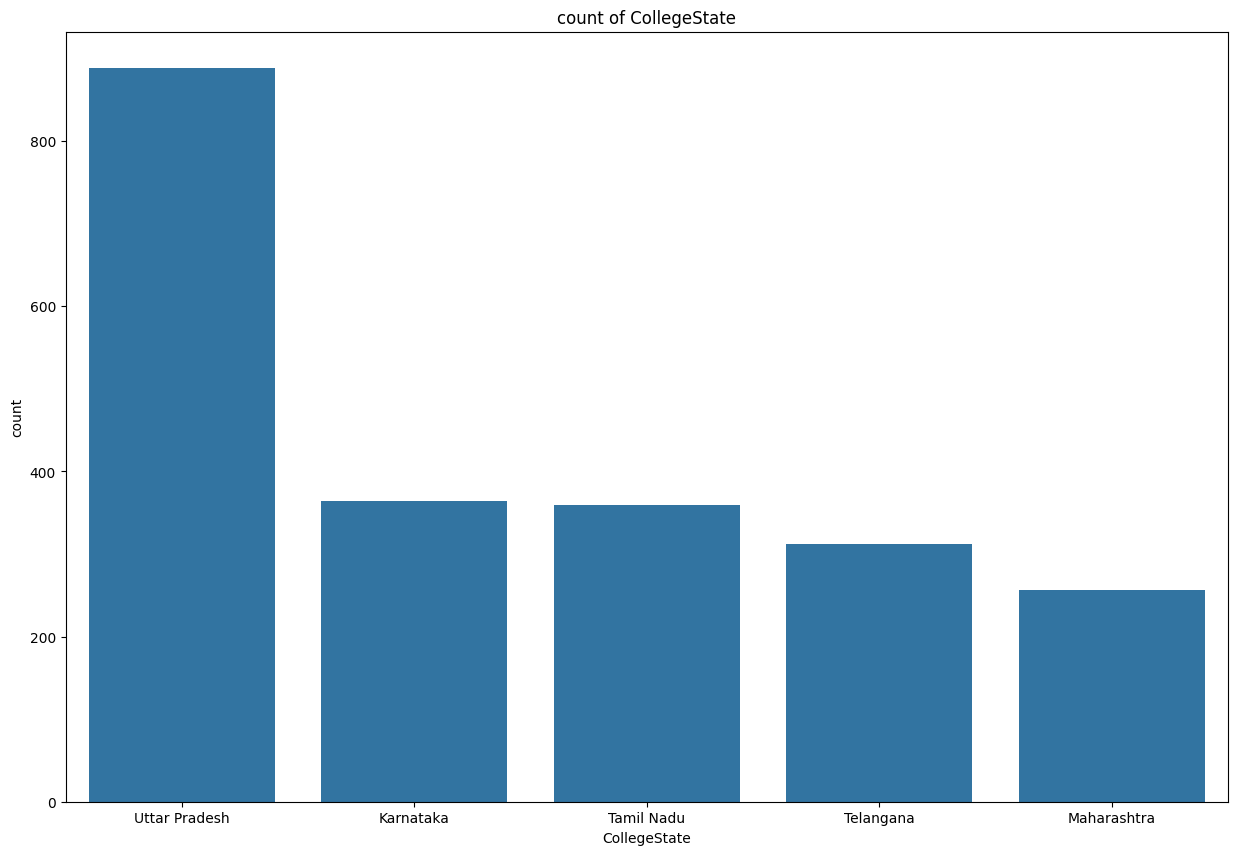

In [37]:
cata=['Designation','Degree','JobCity','Gender','CollegeTier','CollegeState']
def uni_cata(df1):
    cat_df = df.select_dtypes(include=['object'])

    for i in cat_df:
         print(f'{'*'*50} The column {i} {'*'*50}\n',
            f'The number of uniqueness in the column: {df1[i].nunique()}\n\n',
            f'And the values : {df1[i].unique()[-50:]}\n\n'
            f'The most frequent value :{df[i].mode().values}\n',
            f'And the Value Counts : {df[i].value_counts()}')
         plt.figure(figsize=(15,10))
         plt.title(f"count of {i}")
         sns.barplot(data=df1[i].value_counts().head())
         plt.show()
        
uni_cata(df1=cleaned_df)

Now Bi-variate Analysis!

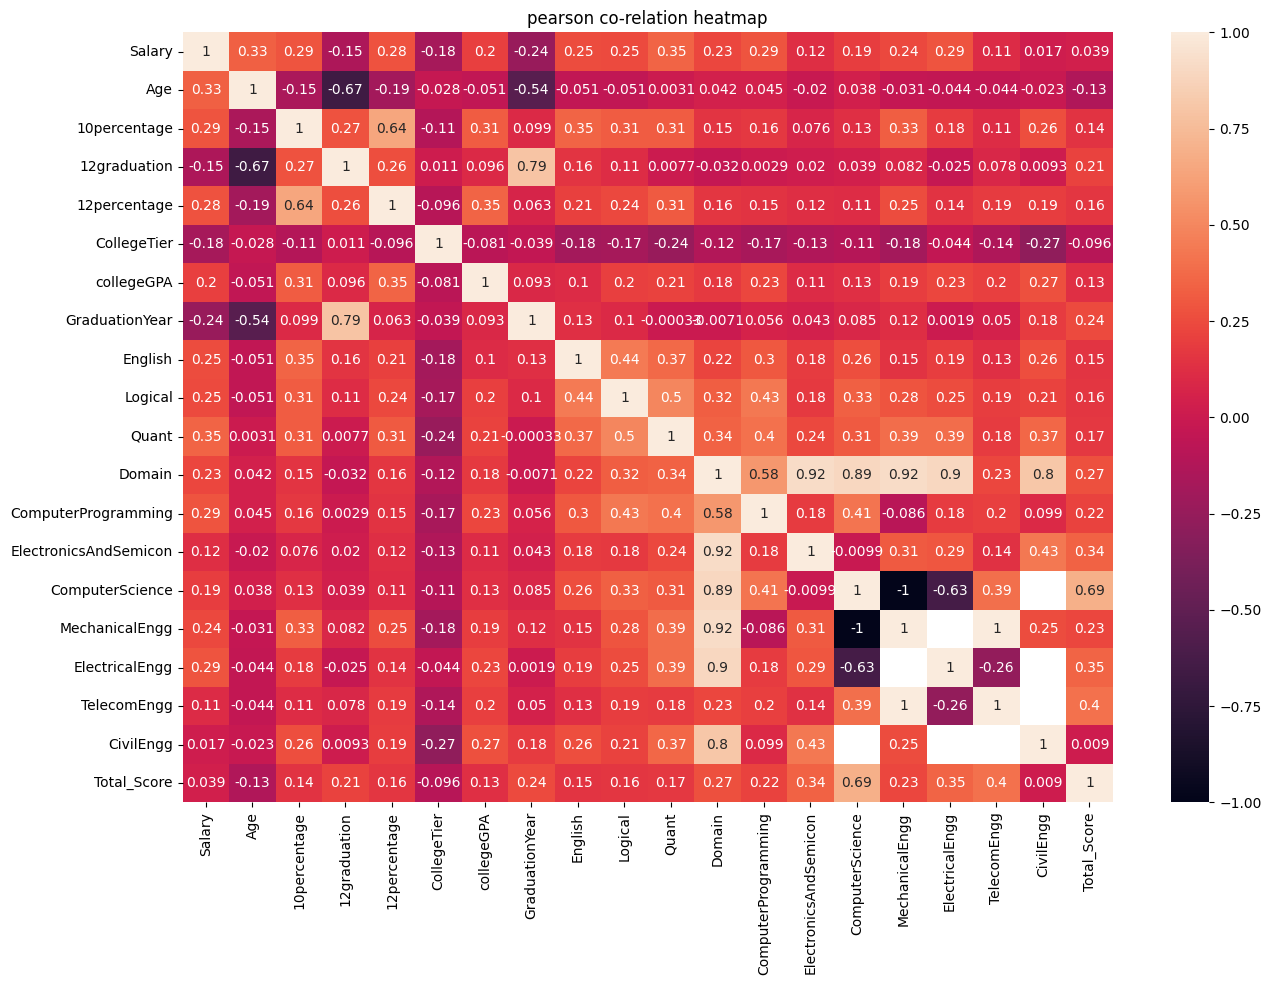

In [38]:
plt.figure(figsize=(15,10))
plt.title("pearson co-relation heatmap")
sns.heatmap(num_df.corr(method="pearson"),annot=True)

plt.show()

Is it really matters to get more marks to get high paid jobs !

In [43]:
gpavssal_df=cleaned_df[['collegeGPA','Salary','Designation']]
gpavssal_df

collegeGPA    Salary                  Designation
0          78.00  420000.0      senior quality engineer
1          70.06  500000.0            assistant manager
2          70.00  325000.0             systems engineer
4          73.90  200000.0                          get
5          76.32  300000.0              system engineer
...          ...       ...                          ...
3993       61.50  280000.0            software engineer
3994       77.30  100000.0             technical writer
3995       70.00  320000.0  associate software engineer
3996       70.42  200000.0           software developer
3997       68.00  400000.0      senior systems engineer

[3888 rows x 3 columns]

In [45]:
gpa_sal_desi_df=gpavssal_df.groupby(['Designation','collegeGPA'],as_index=False).agg({'Salary':pd.Series.mean})
gpa_sal_desi_df

Designation  collegeGPA    Salary
0                    .net developer       58.25  145000.0
1                    .net developer       59.07  180000.0
2                    .net developer       61.00  100000.0
3                    .net developer       62.00  200000.0
4                    .net developer       62.28  120000.0
...                             ...         ...       ...
3240                  web developer       79.60  200000.0
3241                  web developer       84.10  240000.0
3242                     web intern       71.00  205000.0
3243       website developer/tester       69.20  200000.0
3244  windows systems administrator       74.00  200000.0

[3245 rows x 3 columns]

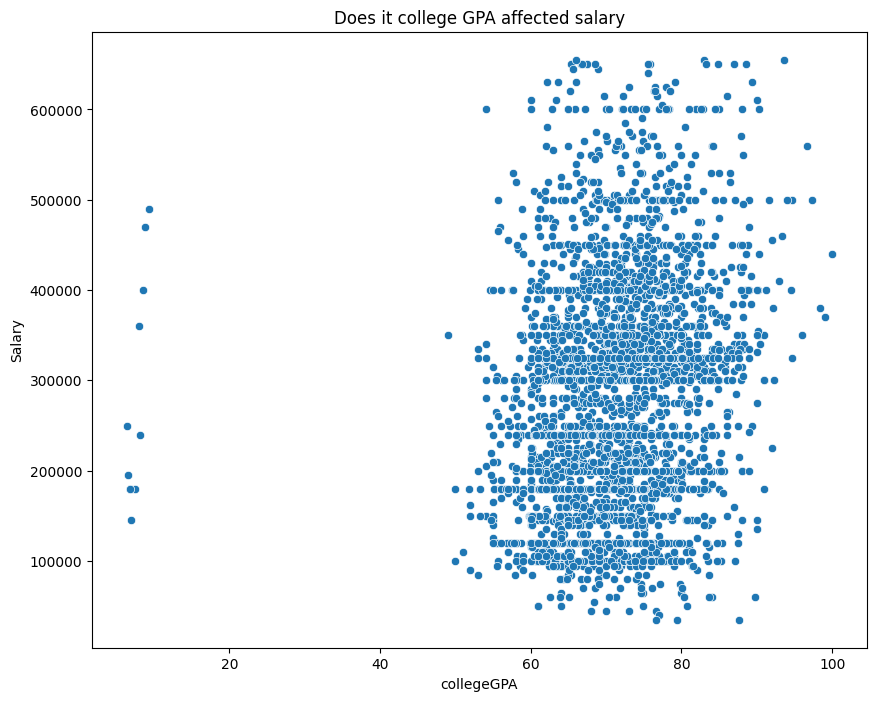

In [46]:
plt.figure(figsize=(10,8))
plt.title("Does it college GPA affected salary")
sns.scatterplot(x=gpa_sal_desi_df["collegeGPA"],y=gpa_sal_desi_df["Salary"])
plt.show()

In [48]:
cleaned_df["collegeGPA"].sort_values(ascending=True).head(15)

3308     6.45
138      6.63
788      6.80
1419     6.85
2151     6.95
1767     7.56
1439     8.07
2229     8.13
7        8.58
2662     8.88
2293     9.30
2836    49.07
3448    50.00
907     50.00
3293    51.00
Name: collegeGPA, dtype: float64

Can Person get below 10? not at all right!, The Candidate who entered below 10 they can misunderstood and may be put under CGPA Scores

In [50]:
gpa_sal_desi_df['collegeGPA'] = gpa_sal_desi_df['collegeGPA'].apply(lambda x: x*10 if x <= 10 else x)
gpa_sal_desi_df[gpa_sal_desi_df['collegeGPA'] < 10]

Empty DataFrame
Columns: [Designation, collegeGPA, Salary]
Index: []

In [51]:
gpa_vs_sal_removed_outl_df = gpa_sal_desi_df
gpa_vs_sal_removed_outl_df

Designation  collegeGPA    Salary
0                    .net developer       58.25  145000.0
1                    .net developer       59.07  180000.0
2                    .net developer       61.00  100000.0
3                    .net developer       62.00  200000.0
4                    .net developer       62.28  120000.0
...                             ...         ...       ...
3240                  web developer       79.60  200000.0
3241                  web developer       84.10  240000.0
3242                     web intern       71.00  205000.0
3243       website developer/tester       69.20  200000.0
3244  windows systems administrator       74.00  200000.0

[3245 rows x 3 columns]

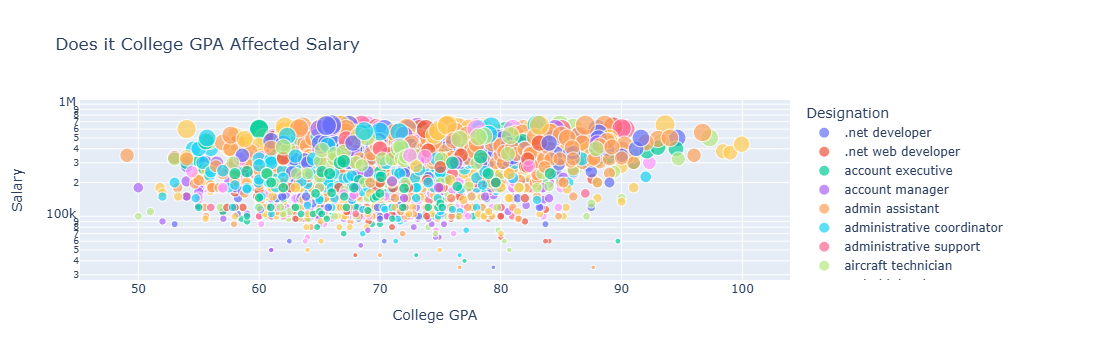

In [52]:
gpa_vs_sal_scatter = px.scatter(
    gpa_vs_sal_removed_outl_df, 
    x='collegeGPA',
    y='Salary',
    title='Does it College GPA Affected Salary',
    size='Salary',
    hover_name=gpa_vs_sal_removed_outl_df.Designation,
    color='Designation'
) 

gpa_vs_sal_scatter.update_layout(
    xaxis_title="College GPA",
    yaxis_title="Salary",
    yaxis=dict(type='log')
)

gpa_vs_sal_scatter.show()

In [53]:
amcat_vs_sal_df=cleaned_df[['Total_Score','Salary','Designation']]
amcat_vs_sal_df

Total_Score    Salary                  Designation
0      445.635979  420000.0      senior quality engineer
1      466.960603  500000.0            assistant manager
2      395.450877  325000.0             systems engineer
4      233.124502  200000.0                          get
5     1052.000000  300000.0              system engineer
...           ...       ...                          ...
3993   345.276047  280000.0            software engineer
3994   745.881620  100000.0             technical writer
3995   405.488348  320000.0  associate software engineer
3996   883.744758  200000.0           software developer
3997   435.600057  400000.0      senior systems engineer

[3888 rows x 3 columns]

In [54]:
amcat_vs_sal_desig_df = amcat_vs_sal_df.groupby(['Designation','Total_Score'],as_index=False).agg({'Salary':pd.Series.mean})
amcat_vs_sal_desig_df

Designation  Total_Score    Salary
0                    .net developer     0.000000  350000.0
1                    .net developer   334.242500  145000.0
2                    .net developer   335.245456  100000.0
3                    .net developer   375.377551  360000.0
4                    .net developer   383.112139  120000.0
...                             ...          ...       ...
3224                  web developer  1065.953900  320000.0
3225                  web developer  1087.991231   80000.0
3226                     web intern   914.842248  205000.0
3227       website developer/tester   701.356536  200000.0
3228  windows systems administrator   435.600057  200000.0

[3229 rows x 3 columns]

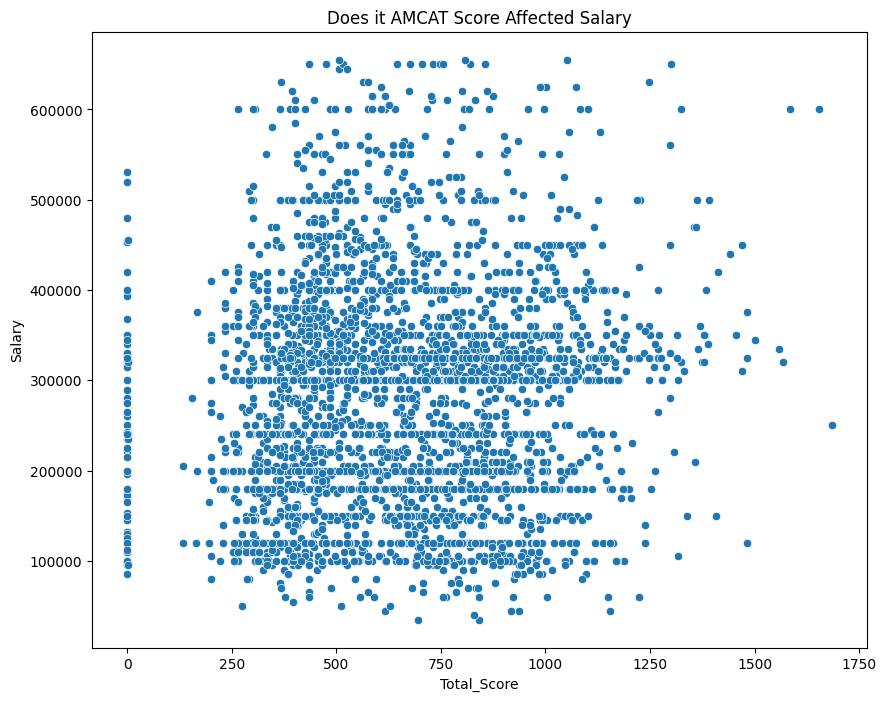

In [55]:
plt.figure(figsize=(10,8))
plt.title("Does it AMCAT Score Affected Salary")
sns.scatterplot(x=amcat_vs_sal_desig_df['Total_Score'],y=amcat_vs_sal_desig_df['Salary'])
plt.show()

In [56]:
amcat_vs_sal_desig_removed_outl_df = amcat_vs_sal_desig_df[amcat_vs_sal_desig_df['Total_Score'] > 100]
amcat_vs_sal_desig_removed_outl_df

Designation  Total_Score    Salary
1                    .net developer   334.242500  145000.0
2                    .net developer   335.245456  100000.0
3                    .net developer   375.377551  360000.0
4                    .net developer   383.112139  120000.0
5                    .net developer   400.824666  120000.0
...                             ...          ...       ...
3224                  web developer  1065.953900  320000.0
3225                  web developer  1087.991231   80000.0
3226                     web intern   914.842248  205000.0
3227       website developer/tester   701.356536  200000.0
3228  windows systems administrator   435.600057  200000.0

[3148 rows x 3 columns]

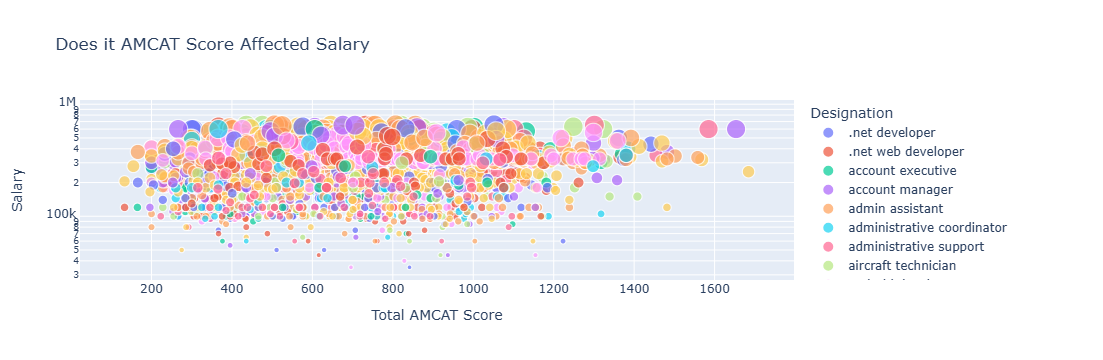

In [57]:
amcat_vs_sal_desig_removed_outl_scatter = px.scatter(
    amcat_vs_sal_desig_removed_outl_df, 
    x='Total_Score',
    y='Salary',
    title='Does it AMCAT Score Affected Salary',
    size='Salary',
    hover_name=amcat_vs_sal_desig_removed_outl_df.Designation,
    color='Designation'
) 

amcat_vs_sal_desig_removed_outl_scatter.update_layout(
    xaxis_title=" Total AMCAT Score",
    yaxis_title="Salary",
    yaxis=dict(type='log')
)

amcat_vs_sal_desig_removed_outl_scatter.show()

Mark's Does'nt Estimate The Salary

In [58]:
cleaned_df['Designation'].value_counts().head(10)

Designation
software engineer             525
software developer            263
system engineer               205
programmer analyst            139
systems engineer              115
java software engineer        110
software test engineer         97
project engineer               77
technical support engineer     74
java developer                 67
Name: count, dtype: int64

In [59]:
top10_design_lst = cleaned_df['Designation'].value_counts().head(10).index
top10_design_lst

Index(['software engineer', 'software developer', 'system engineer',
       'programmer analyst', 'systems engineer', 'java software engineer',
       'software test engineer', 'project engineer',
       'technical support engineer', 'java developer'],
      dtype='object', name='Designation')

In [60]:
design_choice = ['systems engineer']

cleaned_df['Designation'] = cleaned_df['Designation'].apply(lambda city: correct_spelling_errors(str(city),choices=design_choice))

C:\Users\Aniket\AppData\Local\Temp\ipykernel_19848\3760425128.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
top10_design_grpby = cleaned_df[cleaned_df['Designation'].isin(top10_design_lst)].groupby(['Designation'],as_index=False).agg({'Salary':pd.Series.mean}).sort_values(by='Salary',ascending=False).head(10) #.Designation.values
top10_design_grpby

Designation         Salary
2      programmer analyst  339784.172662
5       software engineer  327342.857143
7        systems engineer  323213.096559
3        project engineer  312922.077922
6  software test engineer  293041.237113
1  java software engineer  288181.818182
4      software developer  248935.361217
0          java developer  245000.000000

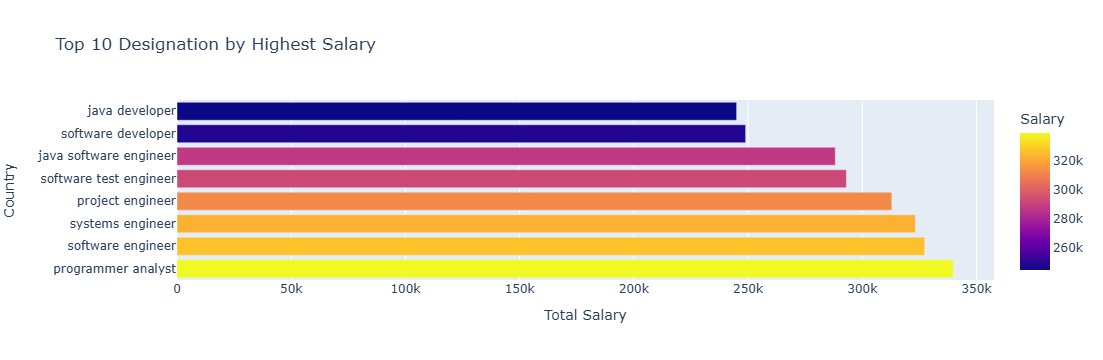

In [62]:
top10_design_bar = px.bar(
    data_frame=top10_design_grpby,
    x=top10_design_grpby.Salary,
    y=top10_design_grpby.Designation,
    orientation='h',
    color='Salary',
    # color_continuous_scale='Viridis',
    hover_name=top10_design_grpby.Salary,
    title='Top 10 Designation by Highest Salary'
)

top10_design_bar.update_layout(
    xaxis_title='Total Salary', 
    yaxis_title='Country',
    # coloraxis_showscale=True
)

top10_design_bar.show()